In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import preprocessing

In [2]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
from sklearn.metrics import silhouette_score

In [2]:
def df_creater(floc1,floc2):
    Crime = pd.read_csv(floc1)
    Crime = Crime[['DBN','Major N','Oth N','NoCrim N','Prop N','Vio N']]
    Crime['Total N'] = Crime['Major N'] +Crime['Oth N'] +Crime['NoCrim N'] +Crime['Prop N'] + Crime['Vio N']
    Crime = Crime.fillna(0)
    SQR = pd.read_csv(floc2)
    if 'School Type' not in SQR.columns:
        if 'High' in floc2:
            SQR['School type'] = 'High School'
    SQR = SQR[['DBN', 'Enrollment', 'Rigorous Instruction - Percent Positive',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Effective School Leadership - Percent Positive',
       'Strong Family-Community Ties - Percent Positive',
       'Trust - Percent Positive', 'Percent English Language Learners',
       'Percent Students with Disabilities', 'Percent Self-Contained',
       'Economic Need Index',
       'Percent in Temp Housing', 'Percent HRA Eligible', 'Percent Asian',
       'Percent Black', 'Percent Hispanic', 'Percent White',
       'Years of principal experience at this school',
       'Percent of teachers with 3 or more years of experience',
       'Student Attendance Rate', 'Percent of Students Chronically Absent',
       'Teacher Attendance Rate', 'Rigorous Instruction Rating',
       'Collaborative Teachers Rating', 'Supportive Environment Rating',
       'Effective School Leadership Rating',
       'Strong Family-Community Ties Rating', 'Trust Rating',
       'Student Achievement Rating','School Type']]

    Crime_merge_SQR = pd.merge(Crime,SQR, on = ['DBN'], how= 'inner')
    #Crime_merge_HQR['TimeStamp'] = '2017-2018'
    Crime_merge_SQR = Crime_merge_SQR.dropna()
    return Crime_merge_SQR

In [3]:
#All_school = pd.concat([df_creater('2017-2018 Schools NYPD Crime Data Report.csv','2017-2018_School_Quality_Reports_-_Elem__Middle___K-8.csv'),
                                    df_creater('2017-2018 Schools NYPD Crime Data Report.csv','2017-2018_School_Quality_Report_-_High_School.csv')], axis = 0)
#All_school.to_csv('All school.csv')

In [3]:
data = pd.read_csv("All school.csv")
data.head()

,Unnamed: 0,DBN,Major N,Oth N,NoCrim N,Prop N,Vio N,Total N,Enrollment,Rigorous Instruction - Percent Positive,...,Percent of Students Chronically Absent,Teacher Attendance Rate,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,Strong Family-Community Ties Rating,Trust Rating,Student Achievement Rating,School Type
0,1,22K052,1.0,1.0,0.0,2.0,0.0,4.0,751,0.88,...,0.233,0.966,Meeting Target,Exceeding Target,Meeting Target,Meeting Target,Meeting Target,Exceeding Target,Approaching Target,Elementary
1,2,28Q008,0.0,0.0,0.0,0.0,0.0,0.0,339,0.83,...,0.348,0.964,Meeting Target,Meeting Target,Approaching Target,Meeting Target,Approaching Target,Meeting Target,Meeting Target,Middle
2,3,13K301,0.0,0.0,0.0,0.0,0.0,0.0,99,0.74,...,0.468,0.965,Approaching Target,Meeting Target,Approaching Target,Meeting Target,Exceeding Target,Meeting Target,Approaching Target,Middle
3,4,14K120,0.0,2.0,3.0,2.0,0.0,7.0,369,0.87,...,0.290,0.963,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,Exceeding Target,Exceeding Target,Meeting Target,Elementary
4,5,28Q174,0.0,0.0,0.0,0.0,0.0,0.0,643,0.77,...,0.147,0.960,Meeting Target,Meeting Target,Meeting Target,Approaching Target,Exceeding Target,Approaching Target,Approaching Target,Elementary


In [4]:
data.shape

(1351, 38)

In [5]:
df_NUM = data.replace({'Rigorous Instruction Rating': {'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Collaborative Teachers Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Supportive Environment Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Effective School Leadership Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Strong Family-Community Ties Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Trust Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Student Achievement Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4}})

In [6]:
df_NUM= df_NUM.iloc[:,2:]
df_NUM=pd.get_dummies(df_NUM)

In [7]:
data = preprocessing.normalize(df_NUM)
print(data.shape)

(1351, 39)


In [8]:
for n_clusters in range(2,7): #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = km.fit_predict(data)
    #report average Silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.5726762805495629
For n_clusters =3, the average silhouette_score is :0.45129019928600894
For n_clusters =4, the average silhouette_score is :0.4549747698345157
For n_clusters =5, the average silhouette_score is :0.3195331088665582
For n_clusters =6, the average silhouette_score is :0.31885799141596266


In [9]:
km = KMeans(n_clusters=2)
res = km.fit(data)
#print('Cluster assignments:',res.labels_)
#print('\nCluster centers:\n',res.cluster_centers_)
#print('\nSum of squared errors:',res.inertia_)

In [10]:
pred=km.predict(data)
df_NUM['overall_pred'] = list(pred)

In [11]:
#list(enumerate(df_NUM.columns))

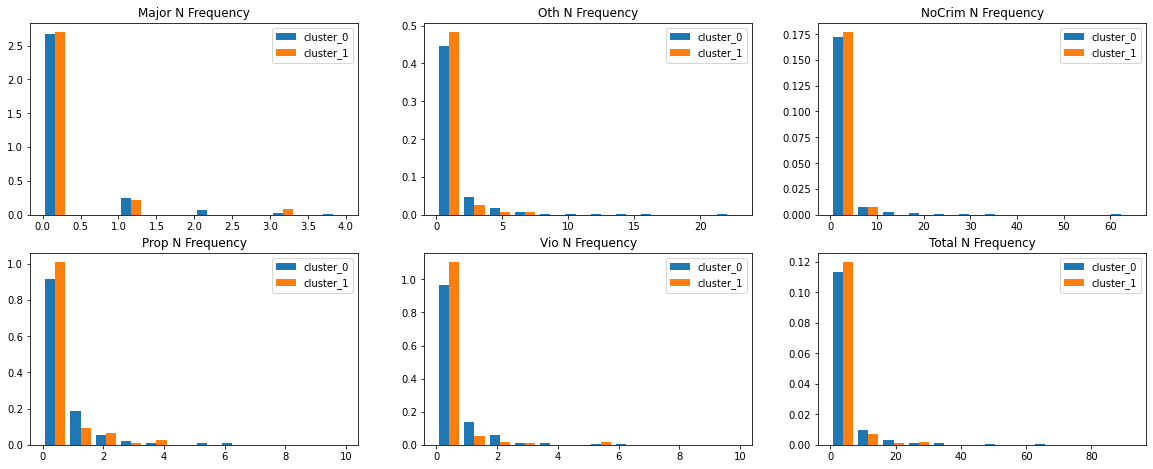

In [12]:
fig = plt.figure(figsize = (20,12));bins = 12
for i in range(6):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['overall_pred']==0].iloc[:,i];y=df_NUM[df_NUM['overall_pred']==1].iloc[:,i]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    #ax.set_xlim([0,8])
    ax.set_title(df_NUM.columns[i]+' Frequency');ax.legend()

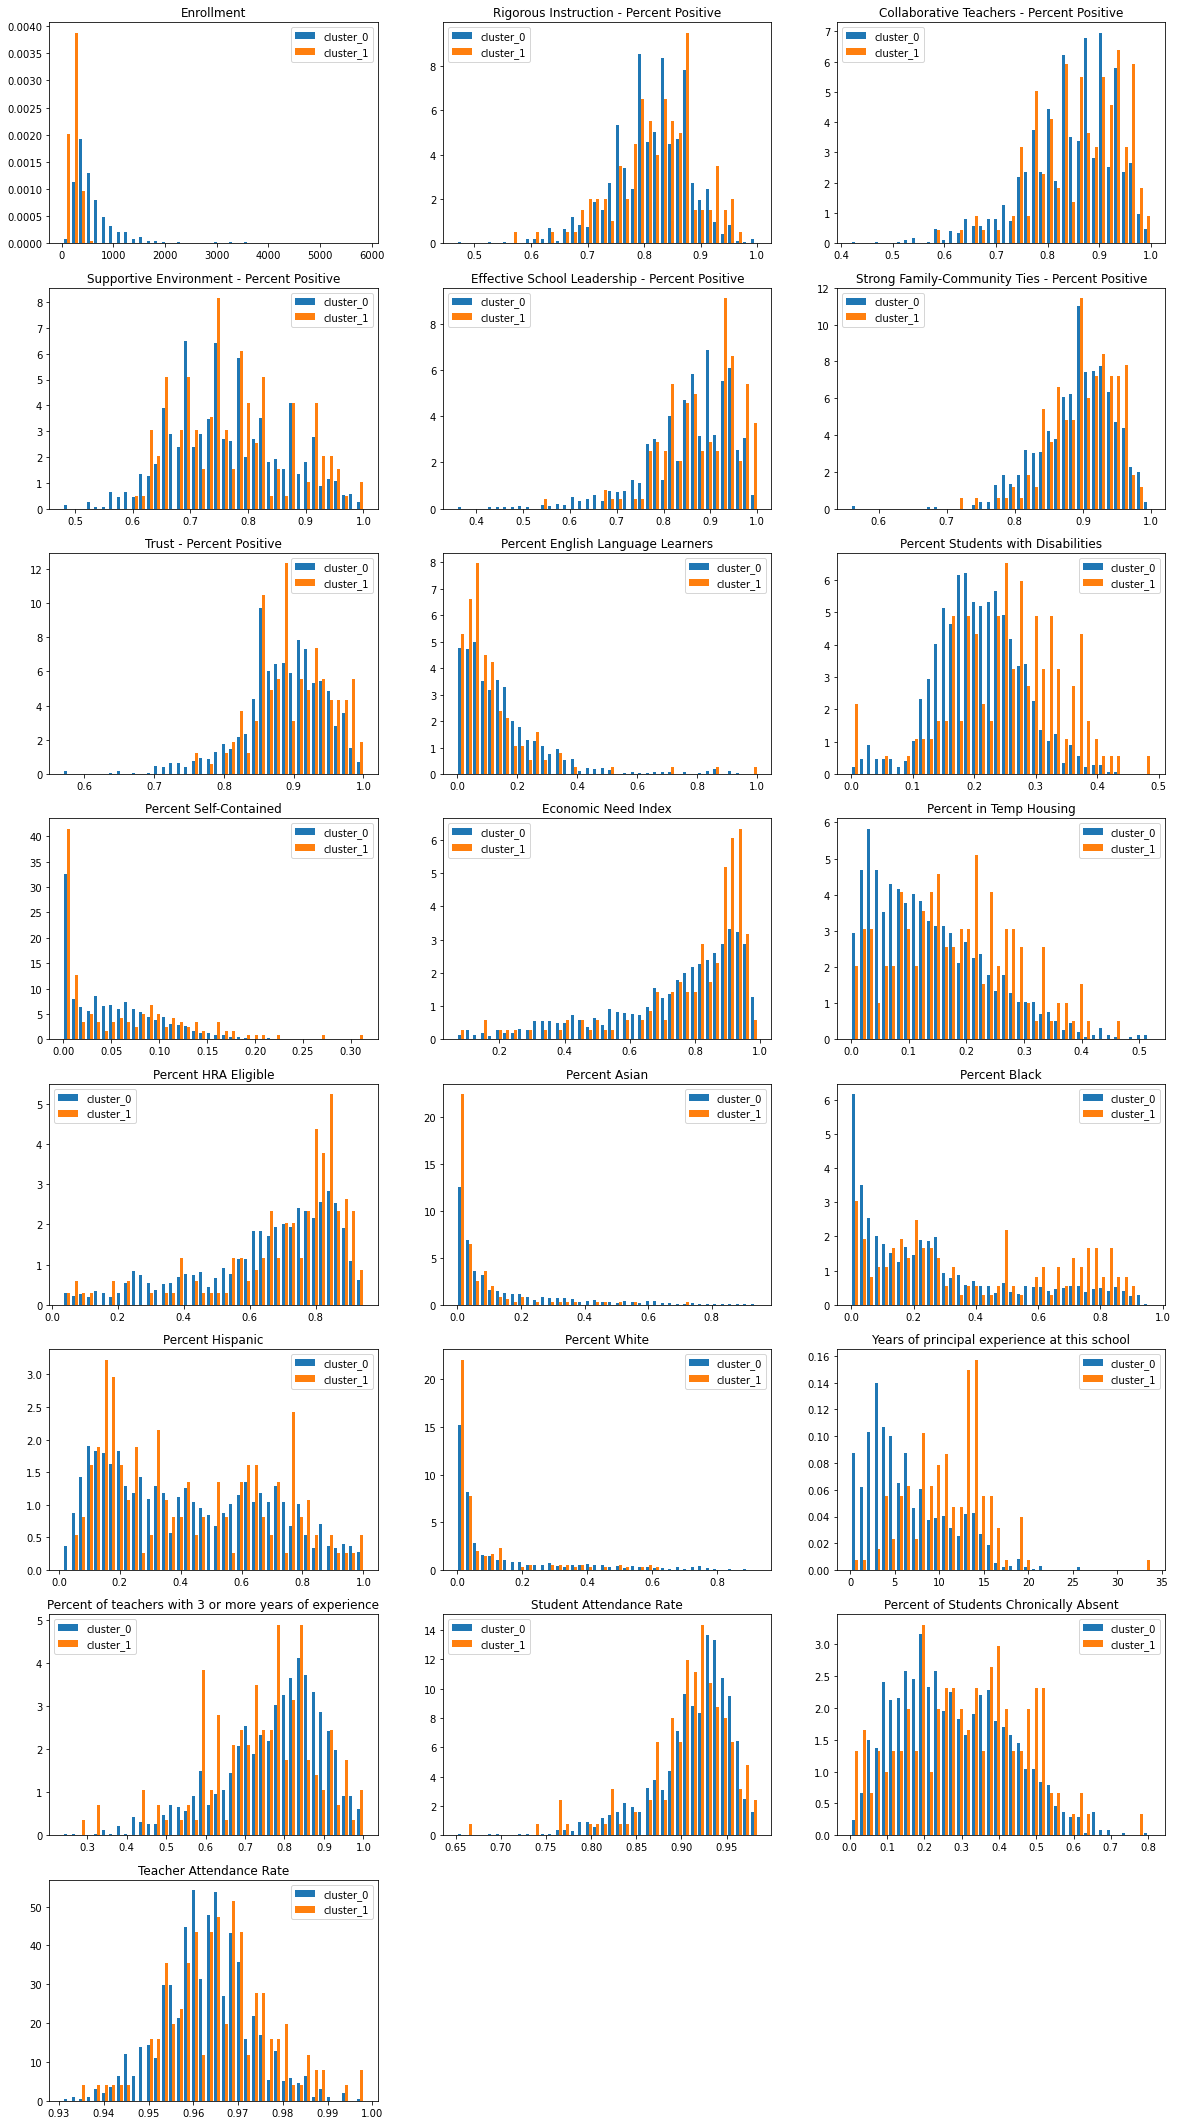

In [13]:
fig = plt.figure(figsize = (20,48));bins = 40
for i in range(22):
    ax = fig.add_subplot(10, 3, i+1)
    x=df_NUM[df_NUM['overall_pred']==0].iloc[:,i+6];y=df_NUM[df_NUM['overall_pred']==1].iloc[:,i+6]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+6]);ax.legend()

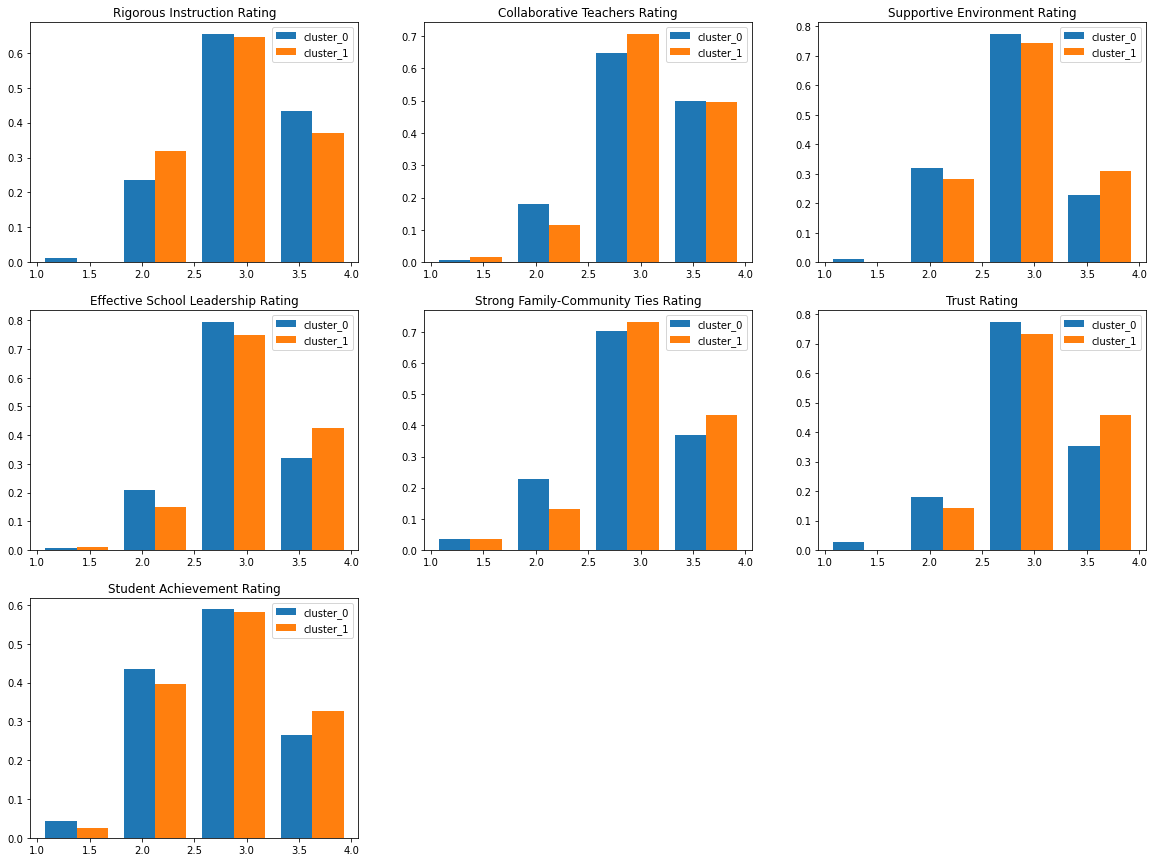

In [14]:
fig = plt.figure(figsize = (20,15));bins = 4
for i in range(7):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['overall_pred']==0].iloc[:,i+28];y=df_NUM[df_NUM['overall_pred']==1].iloc[:,i+28]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+28]);ax.legend()

#### Basic

In [15]:
Basic = df_NUM[['Rigorous Instruction - Percent Positive','Collaborative Teachers - Percent Positive',\
         'Supportive Environment - Percent Positive','Effective School Leadership - Percent Positive',\
         'Rigorous Instruction Rating','Collaborative Teachers Rating', 'Supportive Environment Rating']]
data1 = preprocessing.normalize(Basic)

silhouette_result = {}
for n_clusters in range(2,7): 
    km = KMeans(n_clusters=n_clusters, random_state=10); cluster_labels = km.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels); silhouette_result[n_clusters] = silhouette_avg
    cluster_num = max(silhouette_result, key=silhouette_result.get)
print(cluster_num)    
km = KMeans(n_clusters=cluster_num); res = km.fit(data1); pred=km.predict(data1); df_NUM['basic_pred'] = list(pred)

6


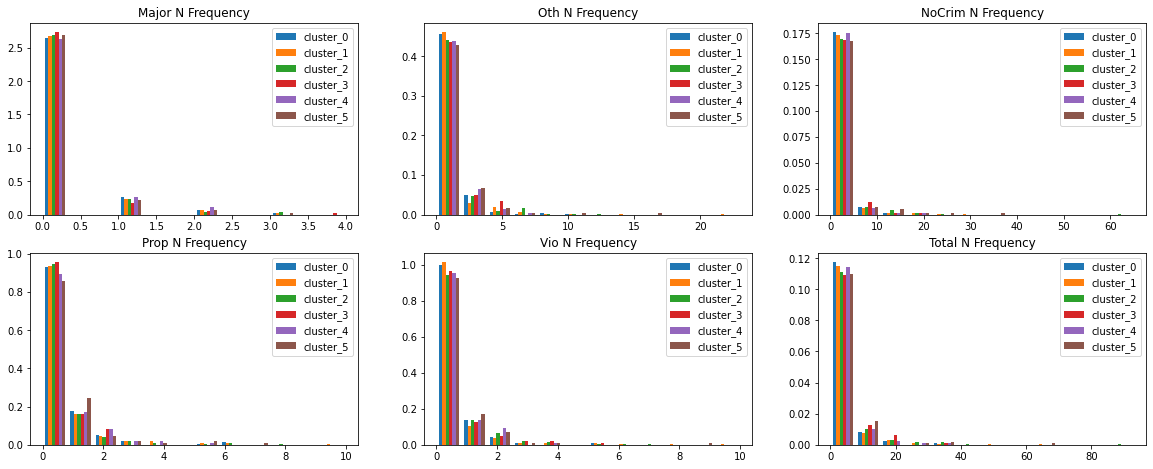

In [16]:
fig = plt.figure(figsize = (20,12));bins = 12
for i in range(6):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['basic_pred']==0].iloc[:,i];y=df_NUM[df_NUM['basic_pred']==1].iloc[:,i];z=df_NUM[df_NUM['basic_pred']==2].iloc[:,i];
    o=df_NUM[df_NUM['basic_pred']==3].iloc[:,i];p=df_NUM[df_NUM['basic_pred']==4].iloc[:,i];q=df_NUM[df_NUM['basic_pred']==5].iloc[:,i];
    ax.hist([x, y, z, o, p, q], bins, label=['cluster_0', 'cluster_1','cluster_2', 'cluster_3','cluster_4', 'cluster_5'],density=True)
    ax.set_title(df_NUM.columns[i]+' Frequency');ax.legend()

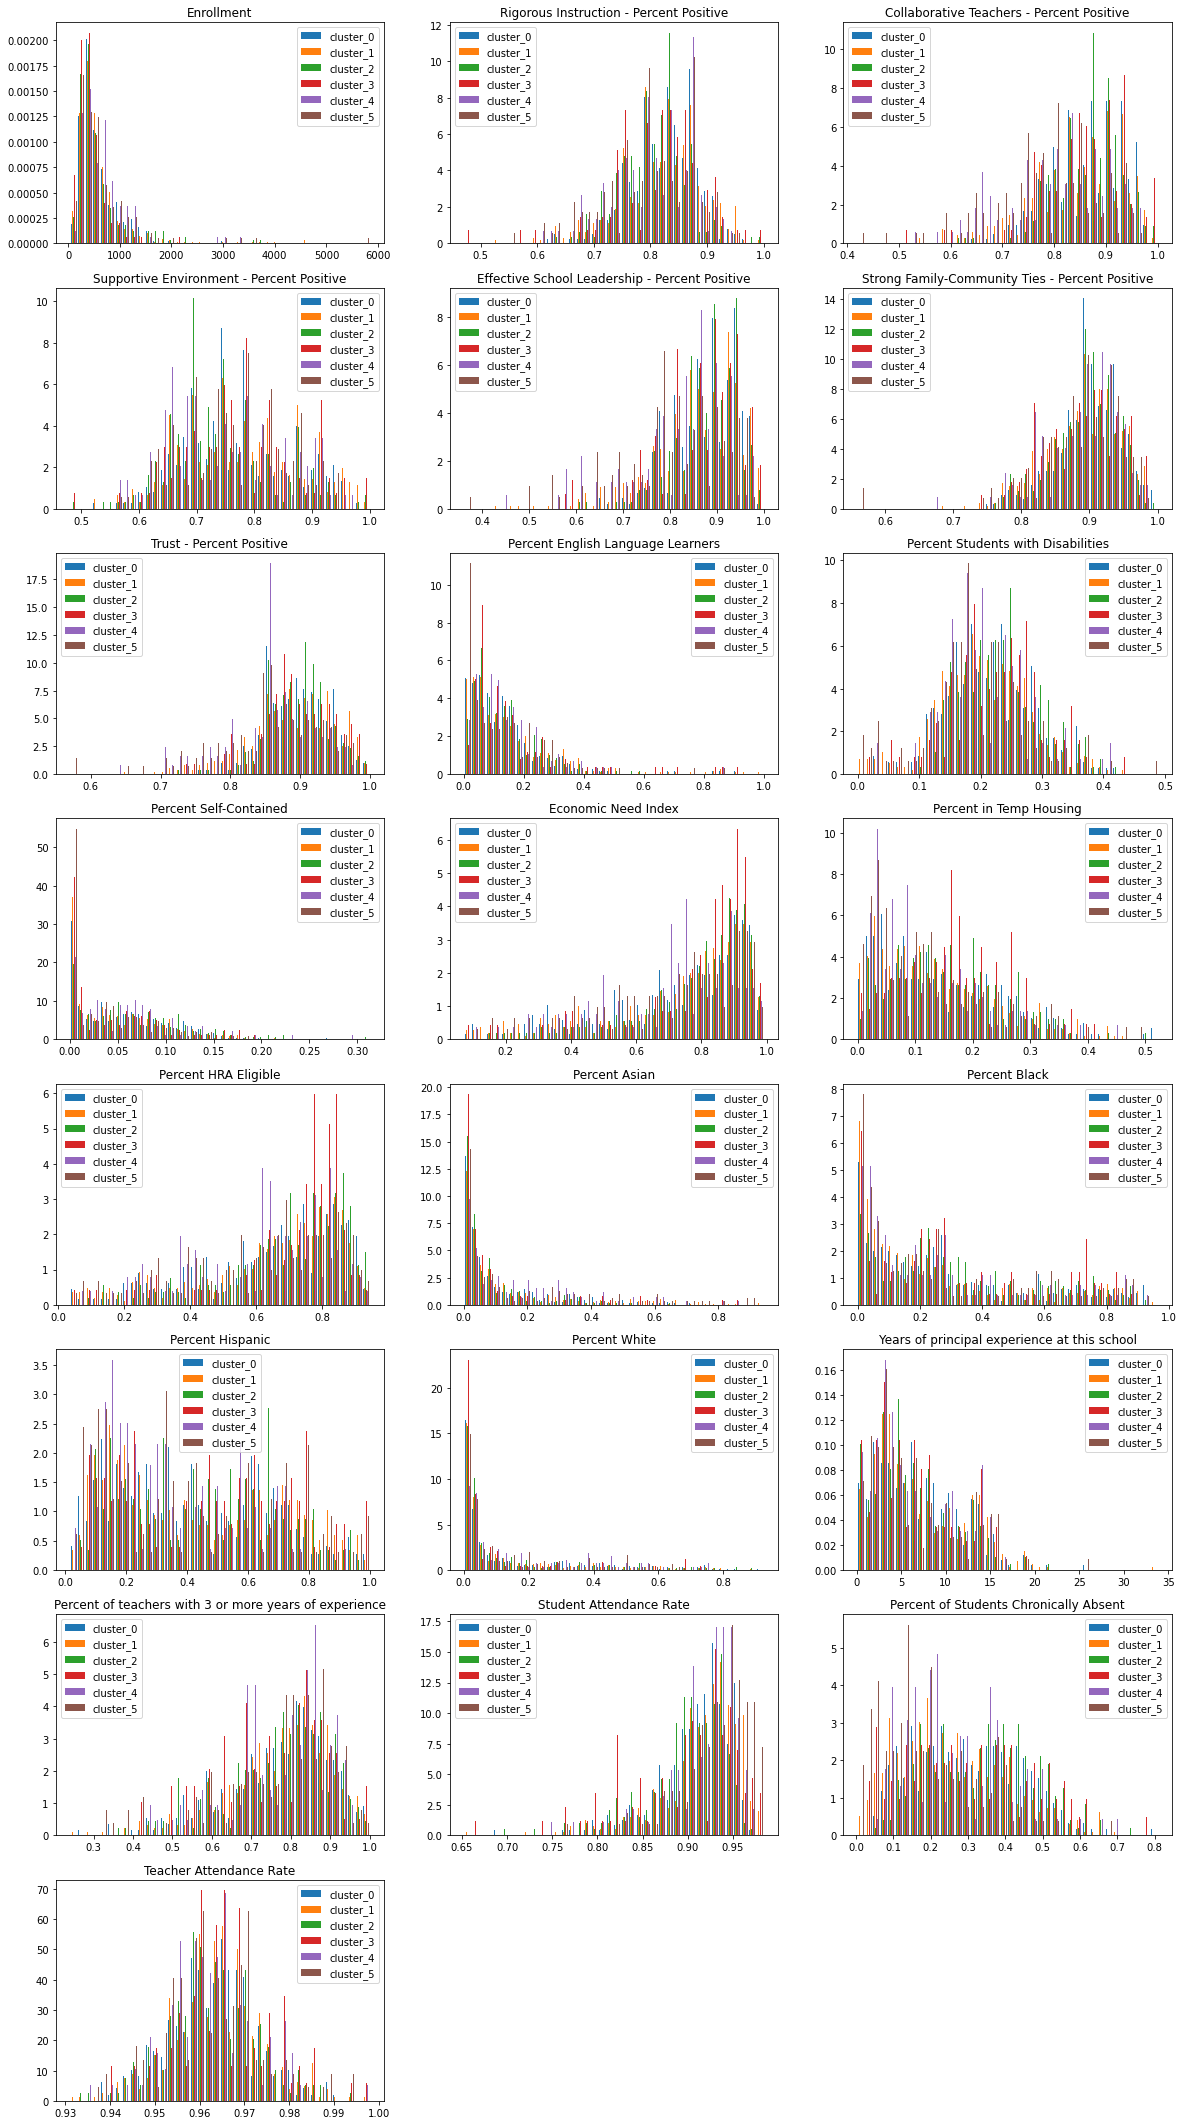

In [17]:
fig = plt.figure(figsize = (20,48));bins = 40
for i in range(22):
    ax = fig.add_subplot(10, 3, i+1)
    x=df_NUM[df_NUM['basic_pred']==0].iloc[:,i+6];y=df_NUM[df_NUM['basic_pred']==1].iloc[:,i+6];z=df_NUM[df_NUM['basic_pred']==2].iloc[:,i+6];
    o=df_NUM[df_NUM['basic_pred']==3].iloc[:,i+6];p=df_NUM[df_NUM['basic_pred']==4].iloc[:,i+6];q=df_NUM[df_NUM['basic_pred']==5].iloc[:,i+6];
    ax.hist([x, y,z,o,p,q], bins, label=['cluster_0', 'cluster_1','cluster_2', 'cluster_3','cluster_4', 'cluster_5'],density=True)
    ax.set_title(df_NUM.columns[i+6]);ax.legend()

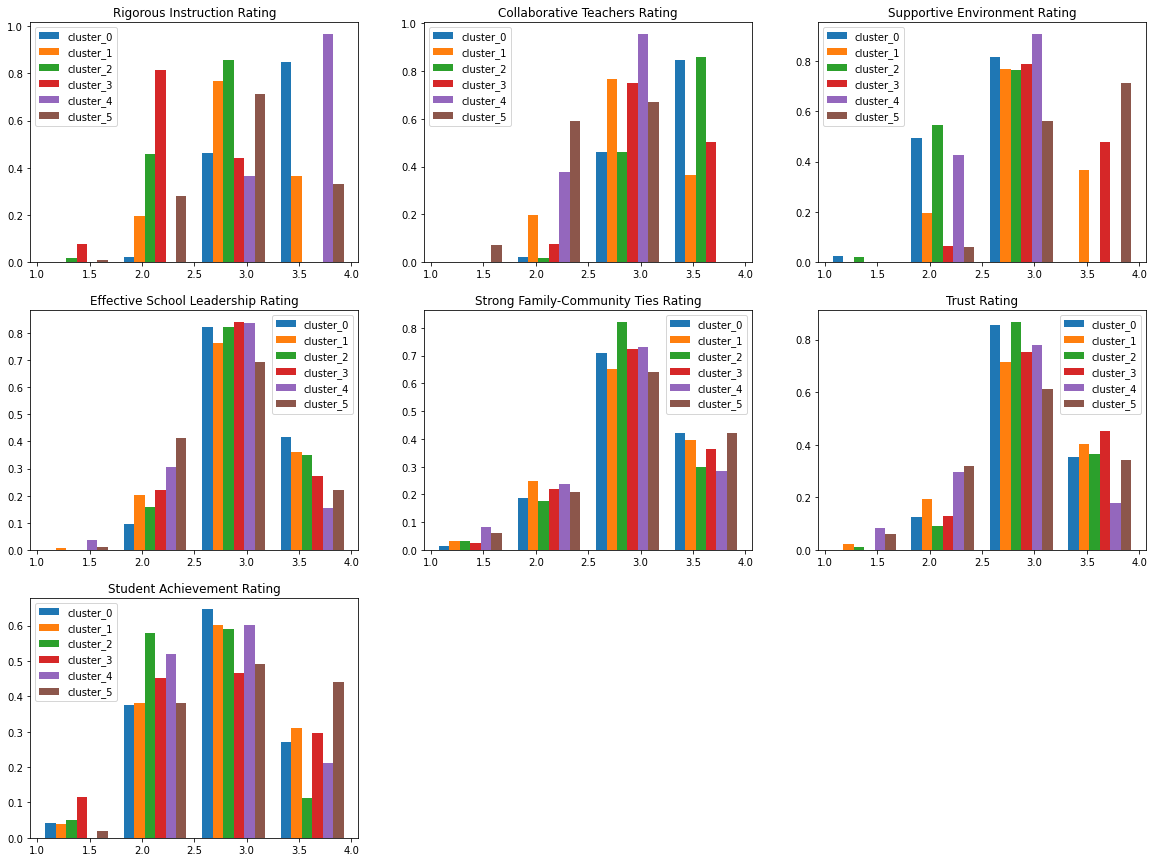

In [18]:
fig = plt.figure(figsize = (20,15));bins = 4
for i in range(7):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['basic_pred']==0].iloc[:,i+28];y=df_NUM[df_NUM['basic_pred']==1].iloc[:,i+28];z=df_NUM[df_NUM['basic_pred']==2].iloc[:,i+28];
    o=df_NUM[df_NUM['basic_pred']==3].iloc[:,i+28];p=df_NUM[df_NUM['basic_pred']==4].iloc[:,i+28];q=df_NUM[df_NUM['basic_pred']==5].iloc[:,i+28];
    ax.hist([x, y,z,o,p,q], bins, label=['cluster_0', 'cluster_1','cluster_2', 'cluster_3','cluster_4', 'cluster_5'],density=True)
    ax.set_title(df_NUM.columns[i+28]);ax.legend()

#### Education_Quality

In [19]:
Education_Quality = df_NUM[['Years of principal experience at this school','Percent of teachers with 3 or more years of experience','Student Attendance Rate', 'Percent of Students Chronically Absent','Teacher Attendance Rate', 'Effective School Leadership Rating']]
data1 = preprocessing.normalize(Education_Quality)

silhouette_result = {}
for n_clusters in range(2,7): 
    km = KMeans(n_clusters=n_clusters, random_state=10); cluster_labels = km.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels); silhouette_result[n_clusters] = silhouette_avg
    cluster_num = max(silhouette_result, key=silhouette_result.get)
print(cluster_num)    
km = KMeans(n_clusters=cluster_num); res = km.fit(data1); pred=km.predict(data1); df_NUM['Education_Quality_pred'] = list(pred)

2


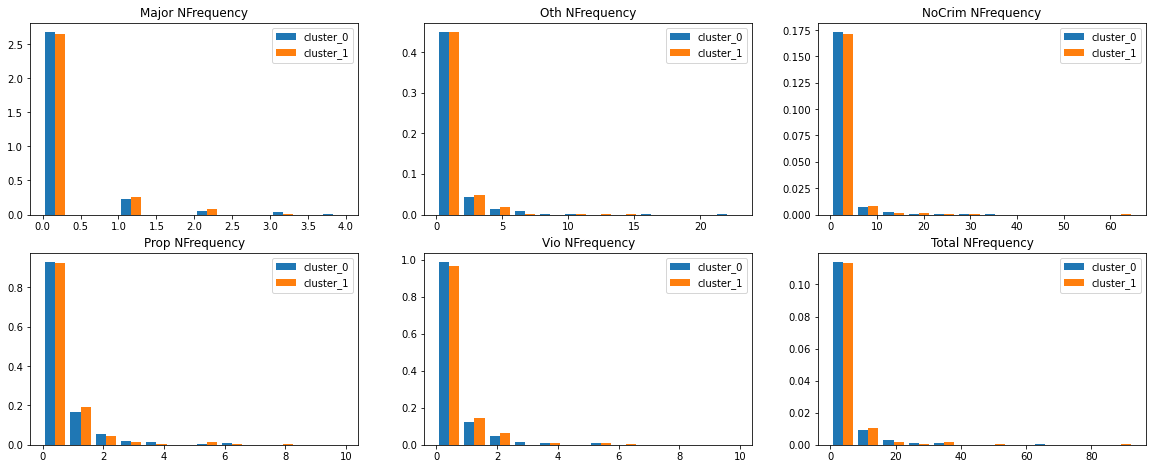

In [20]:
fig = plt.figure(figsize = (20,12));bins = 12
for i in range(6):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['Education_Quality_pred']==0].iloc[:,i];y=df_NUM[df_NUM['Education_Quality_pred']==1].iloc[:,i]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i]+'Frequency');ax.legend()

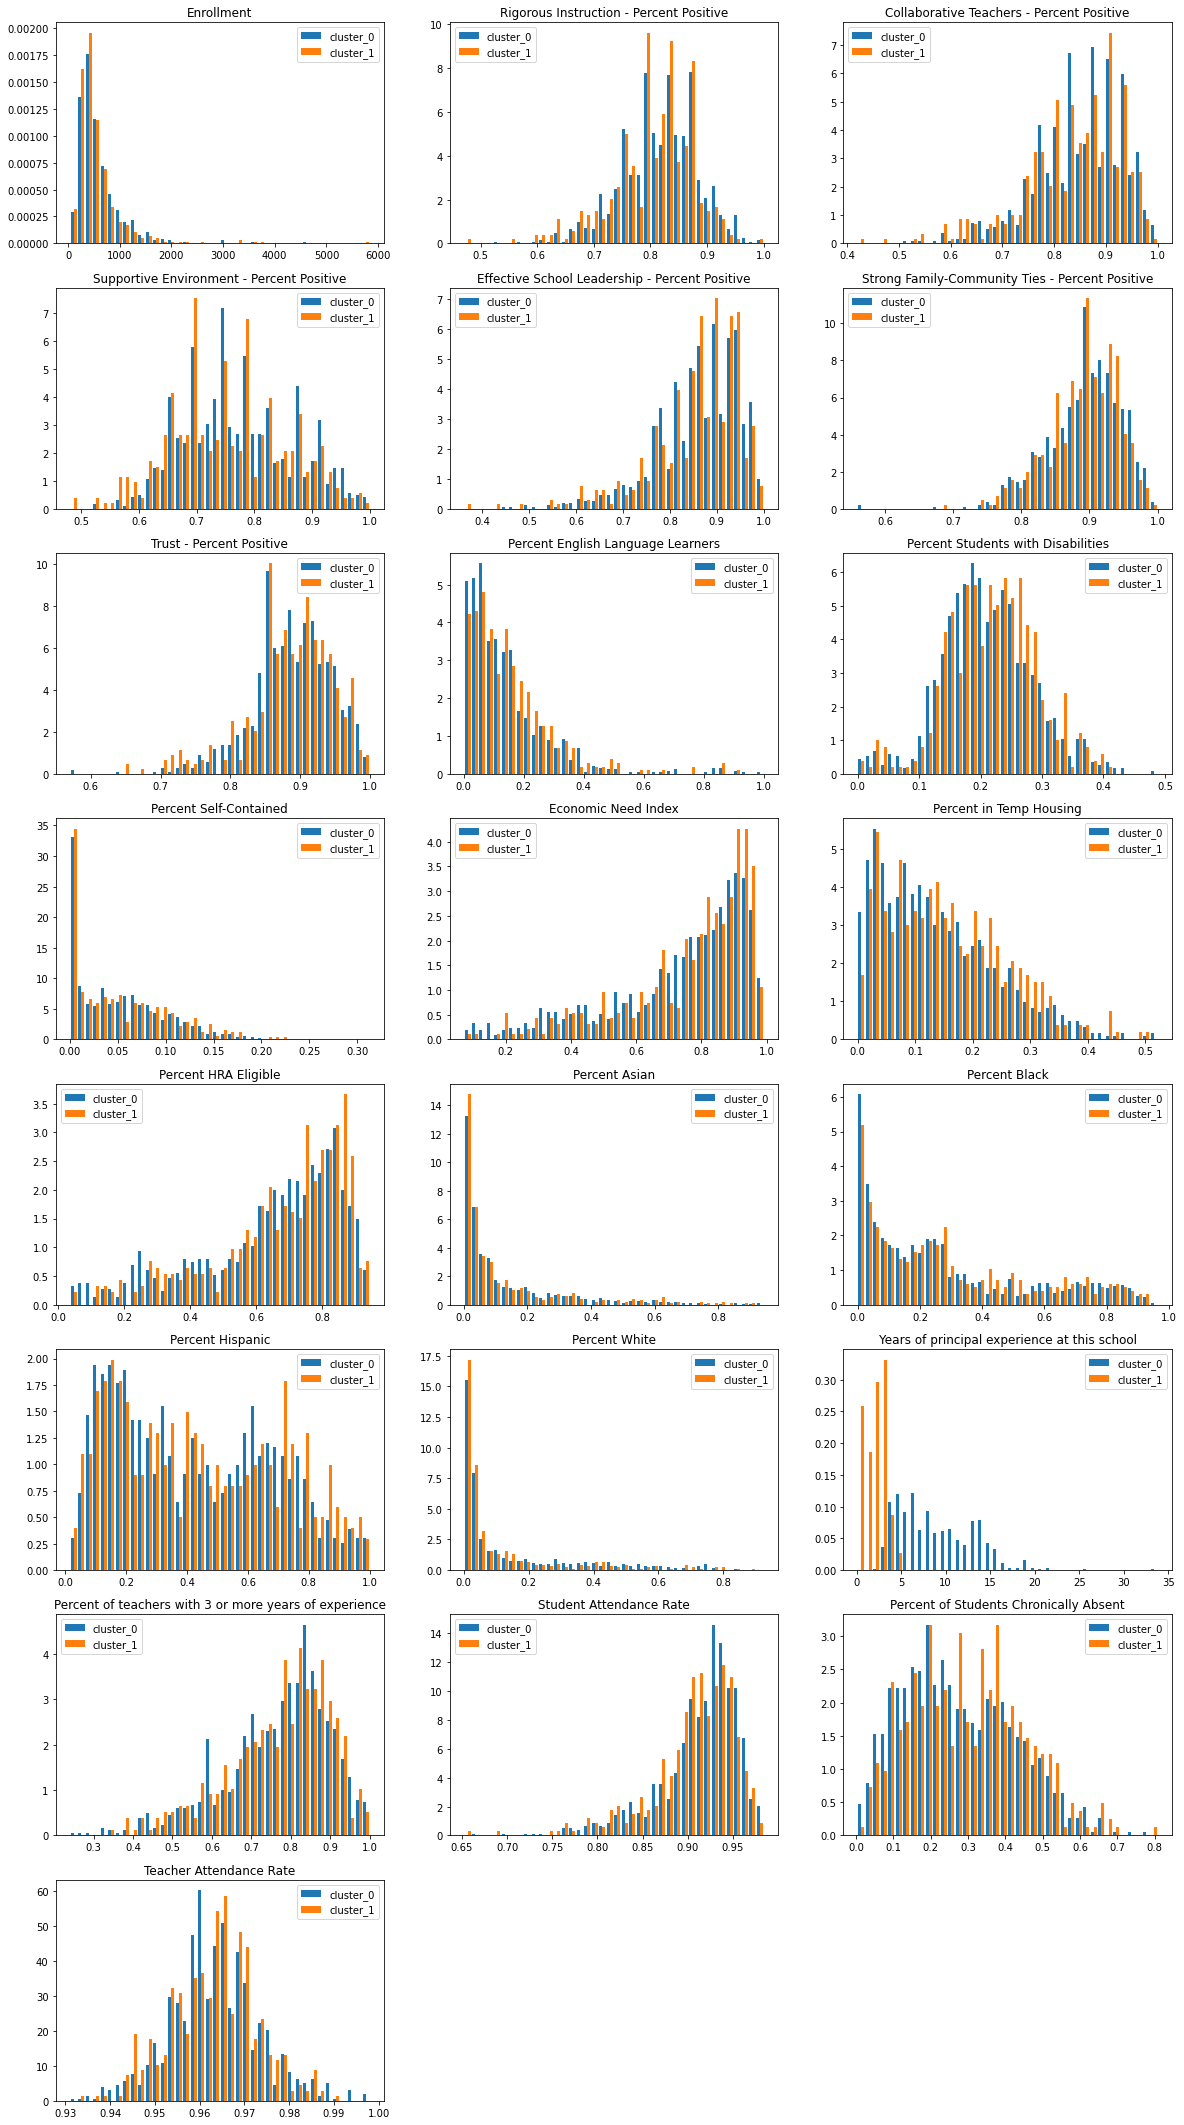

In [21]:
fig = plt.figure(figsize = (20,48));bins = 40
for i in range(22):
    ax = fig.add_subplot(10, 3, i+1)
    x=df_NUM[df_NUM['Education_Quality_pred']==0].iloc[:,i+6];y=df_NUM[df_NUM['Education_Quality_pred']==1].iloc[:,i+6]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+6]);ax.legend()

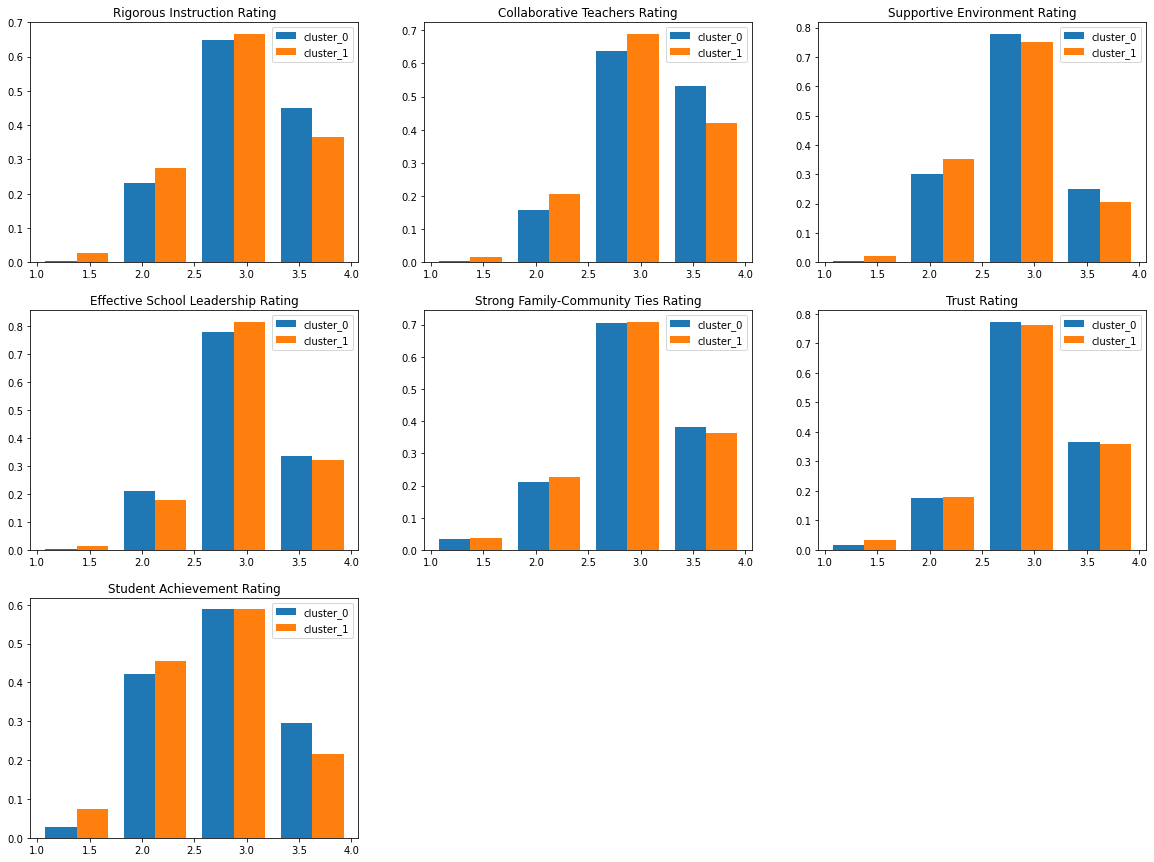

In [22]:
fig = plt.figure(figsize = (20,15));bins = 4
for i in range(7):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['Education_Quality_pred']==0].iloc[:,i+28];y=df_NUM[df_NUM['Education_Quality_pred']==1].iloc[:,i+28]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+28]);ax.legend()

#### Whether_poor

In [23]:
Whether_poor = df_NUM[['Strong Family-Community Ties - Percent Positive','Trust - Percent Positive',\
                'Percent Students with Disabilities','Percent Self-Contained','Economic Need Index',\
                'Percent in Temp Housing', 'Percent HRA Eligible', 'Strong Family-Community Ties Rating', 'Trust Rating']]

data1 = preprocessing.normalize(Whether_poor)

silhouette_result = {}
for n_clusters in range(2,7): 
    km = KMeans(n_clusters=n_clusters, random_state=10); cluster_labels = km.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels); silhouette_result[n_clusters] = silhouette_avg
    cluster_num = max(silhouette_result, key=silhouette_result.get)
print(cluster_num)   
km = KMeans(n_clusters=cluster_num); res = km.fit(data1); pred=km.predict(data1); df_NUM['Whether_poor_pred'] = list(pred)

6


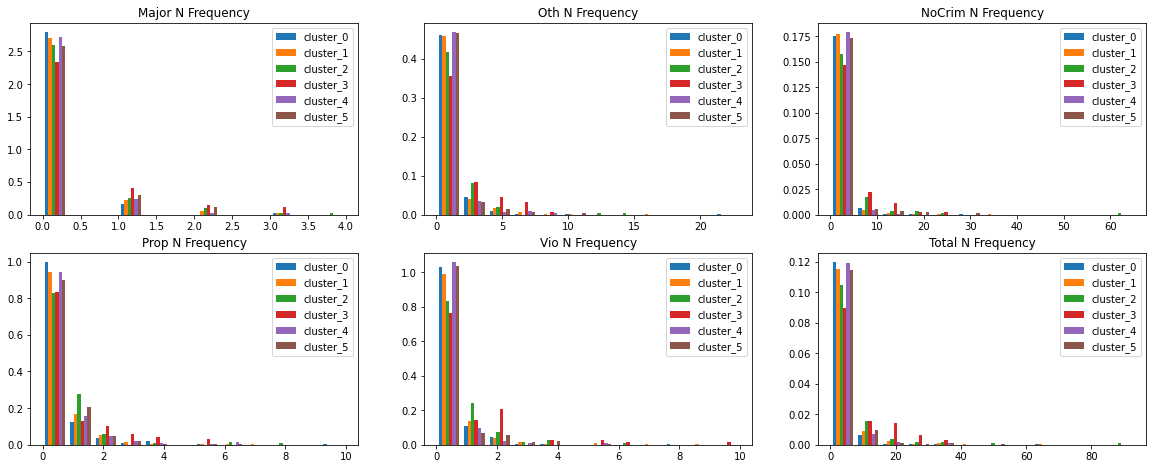

In [24]:
fig = plt.figure(figsize = (20,12));bins = 12
for i in range(6):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['Whether_poor_pred']==0].iloc[:,i];y=df_NUM[df_NUM['Whether_poor_pred']==1].iloc[:,i];z=df_NUM[df_NUM['Whether_poor_pred']==2].iloc[:,i]
    o=df_NUM[df_NUM['Whether_poor_pred']==3].iloc[:,i];p=df_NUM[df_NUM['Whether_poor_pred']==4].iloc[:,i];q=df_NUM[df_NUM['Whether_poor_pred']==5].iloc[:,i]
    ax.hist([x, y,z,o,p,q], bins, label=['cluster_0', 'cluster_1','cluster_2', 'cluster_3','cluster_4', 'cluster_5'],density=True)
    ax.set_title(df_NUM.columns[i]+' Frequency');ax.legend()

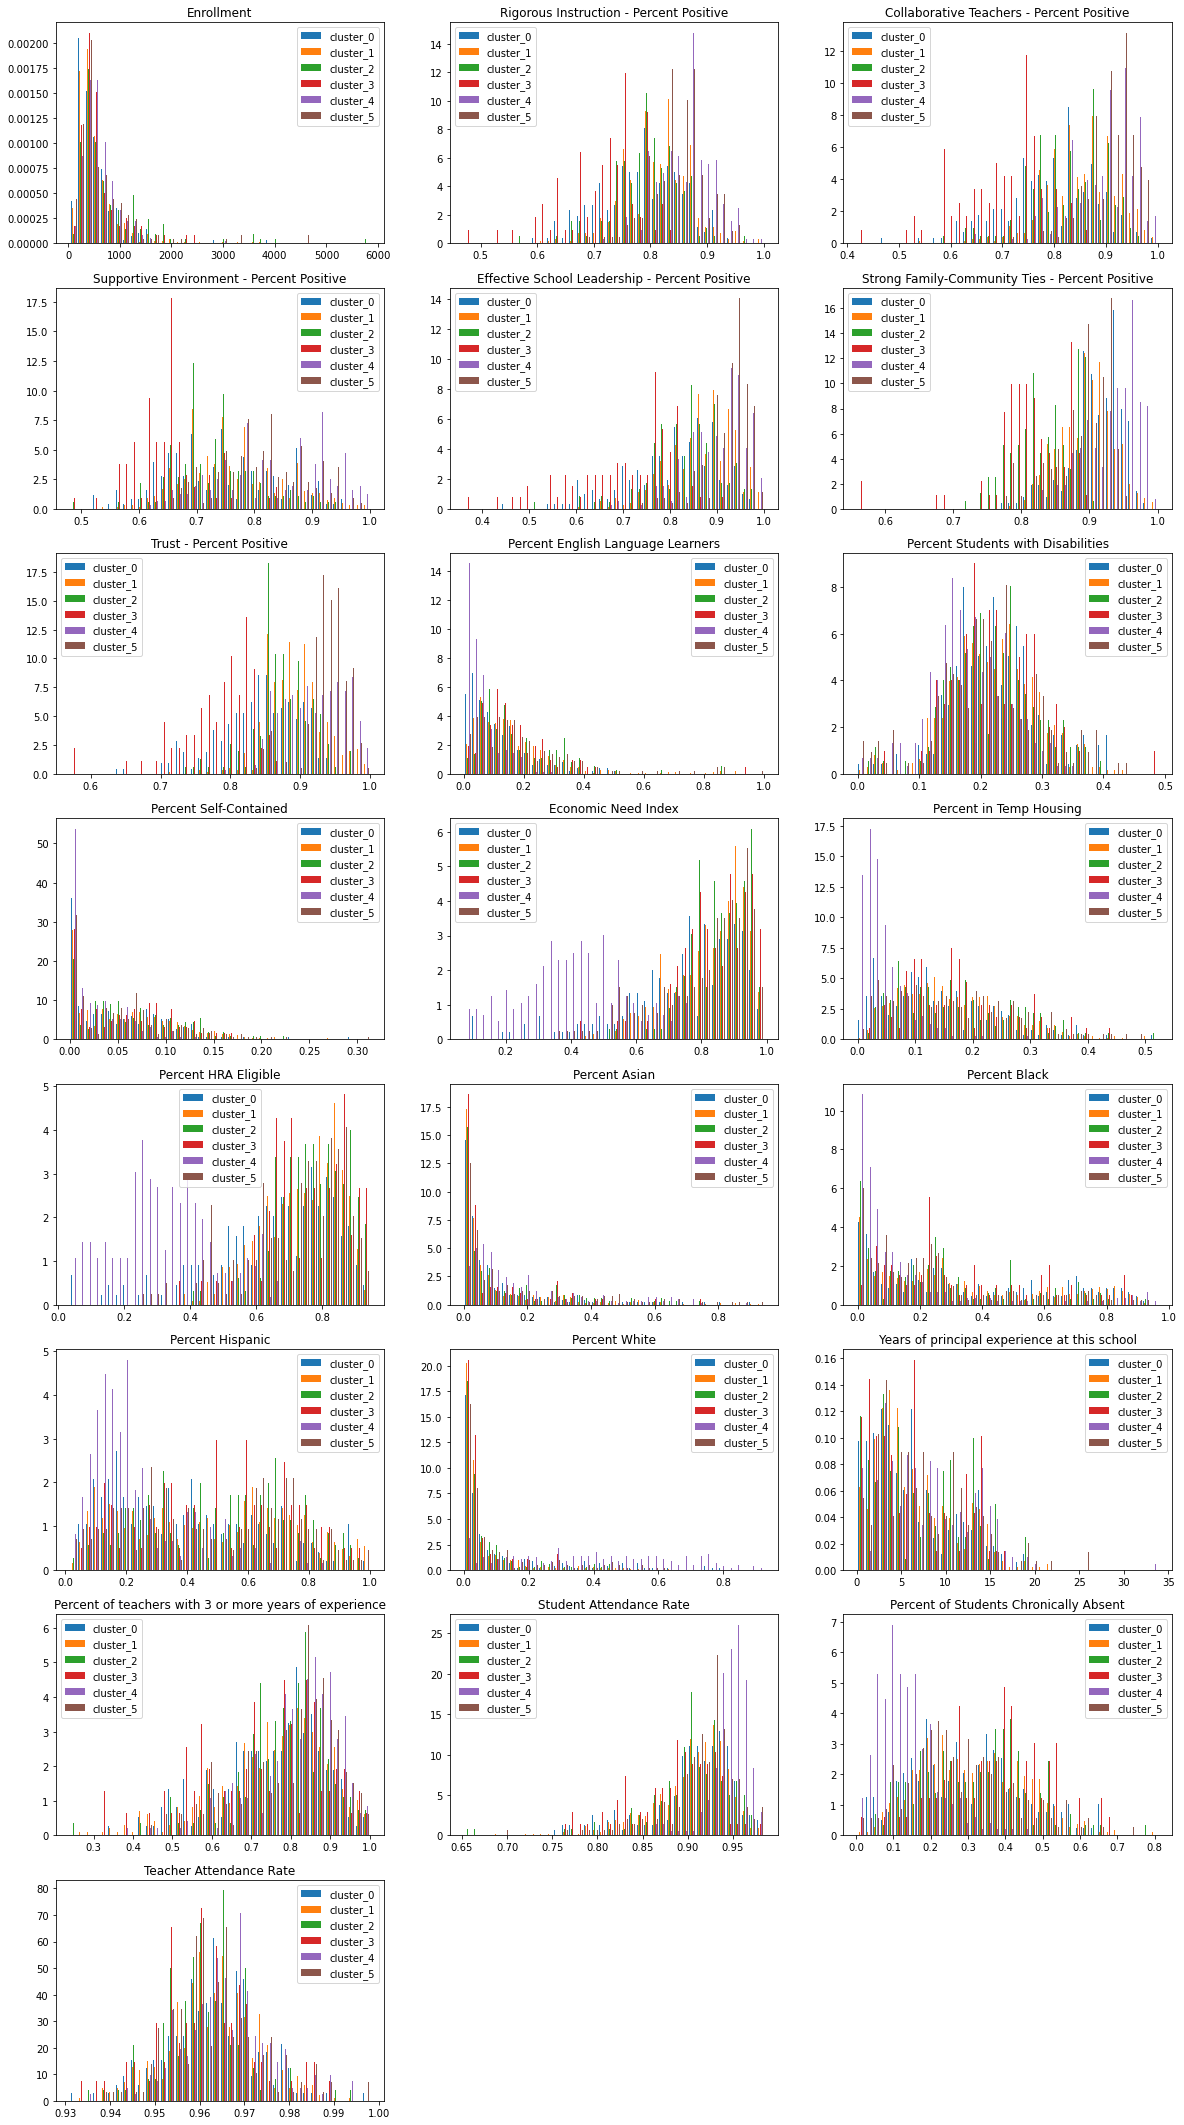

In [25]:
fig = plt.figure(figsize = (20,48));bins = 40
for i in range(22):
    ax = fig.add_subplot(10, 3, i+1)
    x=df_NUM[df_NUM['Whether_poor_pred']==0].iloc[:,i+6];y=df_NUM[df_NUM['Whether_poor_pred']==1].iloc[:,i+6];z=df_NUM[df_NUM['Whether_poor_pred']==2].iloc[:,i+6];
    o=df_NUM[df_NUM['Whether_poor_pred']==3].iloc[:,i+6];p=df_NUM[df_NUM['Whether_poor_pred']==4].iloc[:,i+6];q=df_NUM[df_NUM['Whether_poor_pred']==5].iloc[:,i+6];
    ax.hist([x, y,z,o,p,q], bins, label=['cluster_0', 'cluster_1','cluster_2', 'cluster_3','cluster_4', 'cluster_5'],density=True)
    ax.set_title(df_NUM.columns[i+6]);ax.legend()

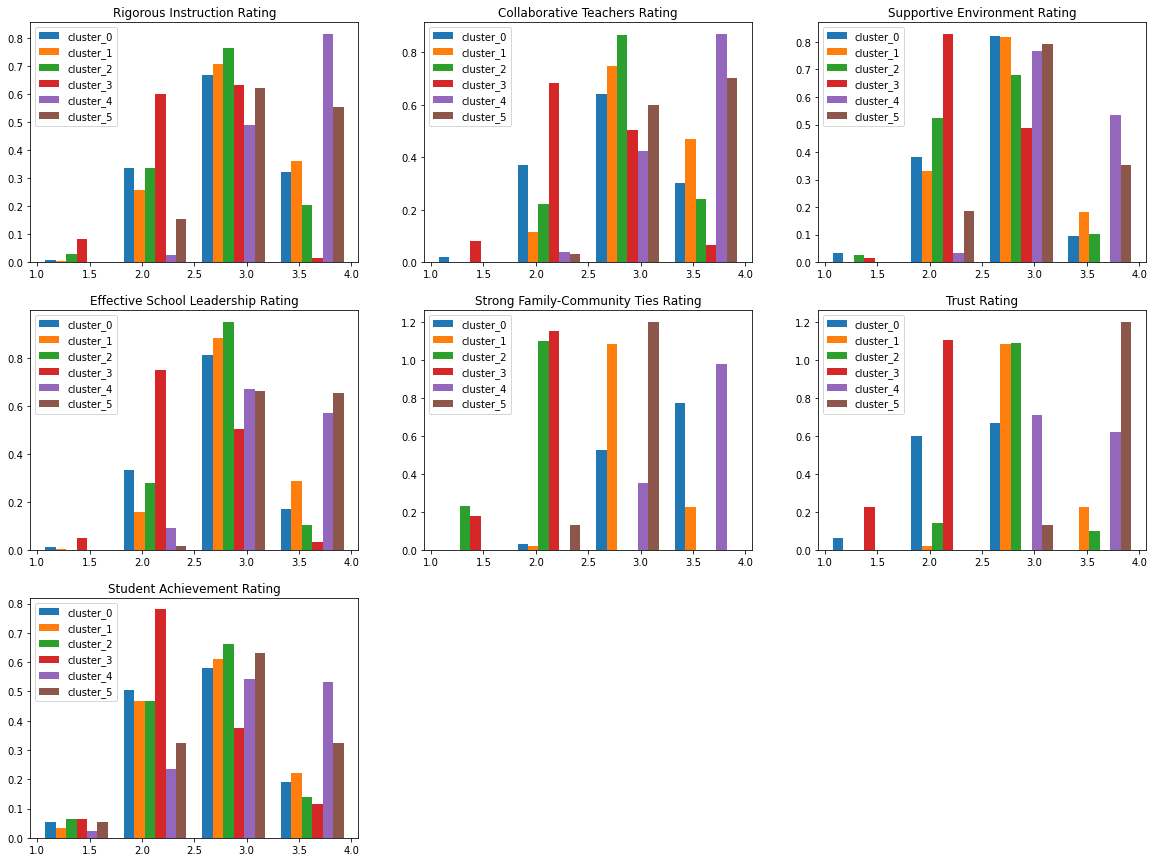

In [26]:
fig = plt.figure(figsize = (20,15));bins = 4
for i in range(7):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['Whether_poor_pred']==0].iloc[:,i+28];y=df_NUM[df_NUM['Whether_poor_pred']==1].iloc[:,i+28];z=df_NUM[df_NUM['Whether_poor_pred']==2].iloc[:,i+28];
    o=df_NUM[df_NUM['Whether_poor_pred']==3].iloc[:,i+28];p=df_NUM[df_NUM['Whether_poor_pred']==4].iloc[:,i+28];q=df_NUM[df_NUM['Whether_poor_pred']==5].iloc[:,i+28];
    ax.hist([x, y,z,o,p,q], bins, label=['cluster_0', 'cluster_1','cluster_2', 'cluster_3','cluster_4', 'cluster_5'],density=True)
    ax.set_title(df_NUM.columns[i+28]);ax.legend()

#### Race

In [27]:
Race = df_NUM[['Percent Asian','Percent Black', 'Percent Hispanic', 'Percent White']]
data1 = preprocessing.normalize(Race)

silhouette_result = {}
for n_clusters in range(2,7): 
    km = KMeans(n_clusters=n_clusters, random_state=10); cluster_labels = km.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels); silhouette_result[n_clusters] = silhouette_avg
    cluster_num = max(silhouette_result, key=silhouette_result.get)
print(cluster_num)    
km = KMeans(n_clusters=cluster_num); res = km.fit(data1); pred=km.predict(data1); df_NUM['race_pred'] = list(pred)

4


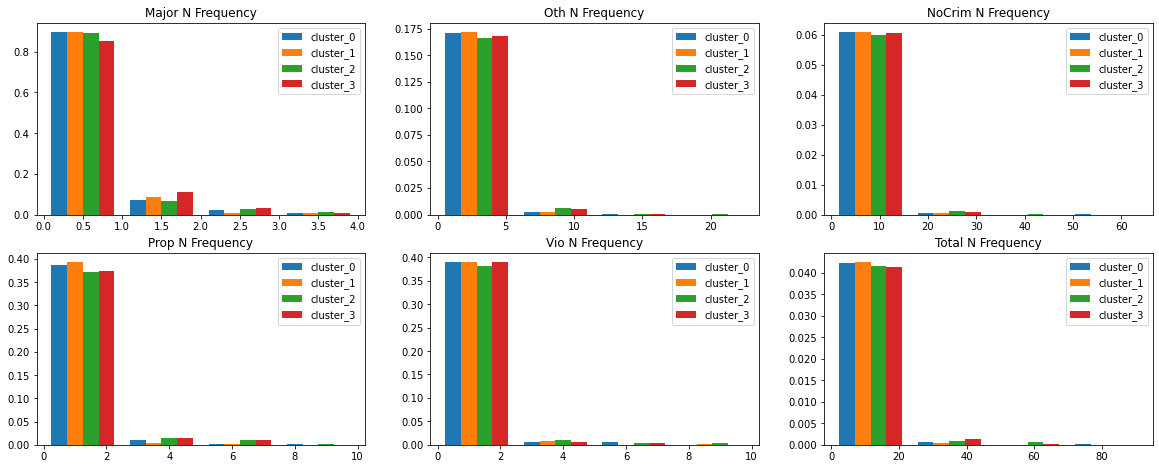

In [28]:
fig = plt.figure(figsize = (20,12));bins = 4
for i in range(6):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['race_pred']==0].iloc[:,i];y=df_NUM[df_NUM['race_pred']==1].iloc[:,i];z=df_NUM[df_NUM['race_pred']==2].iloc[:,i];q=df_NUM[df_NUM['race_pred']==3].iloc[:,i]
    ax.hist([x, y, z, q], bins, label=['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3'],density=True)
    ax.set_title(df_NUM.columns[i]+' Frequency');ax.legend()

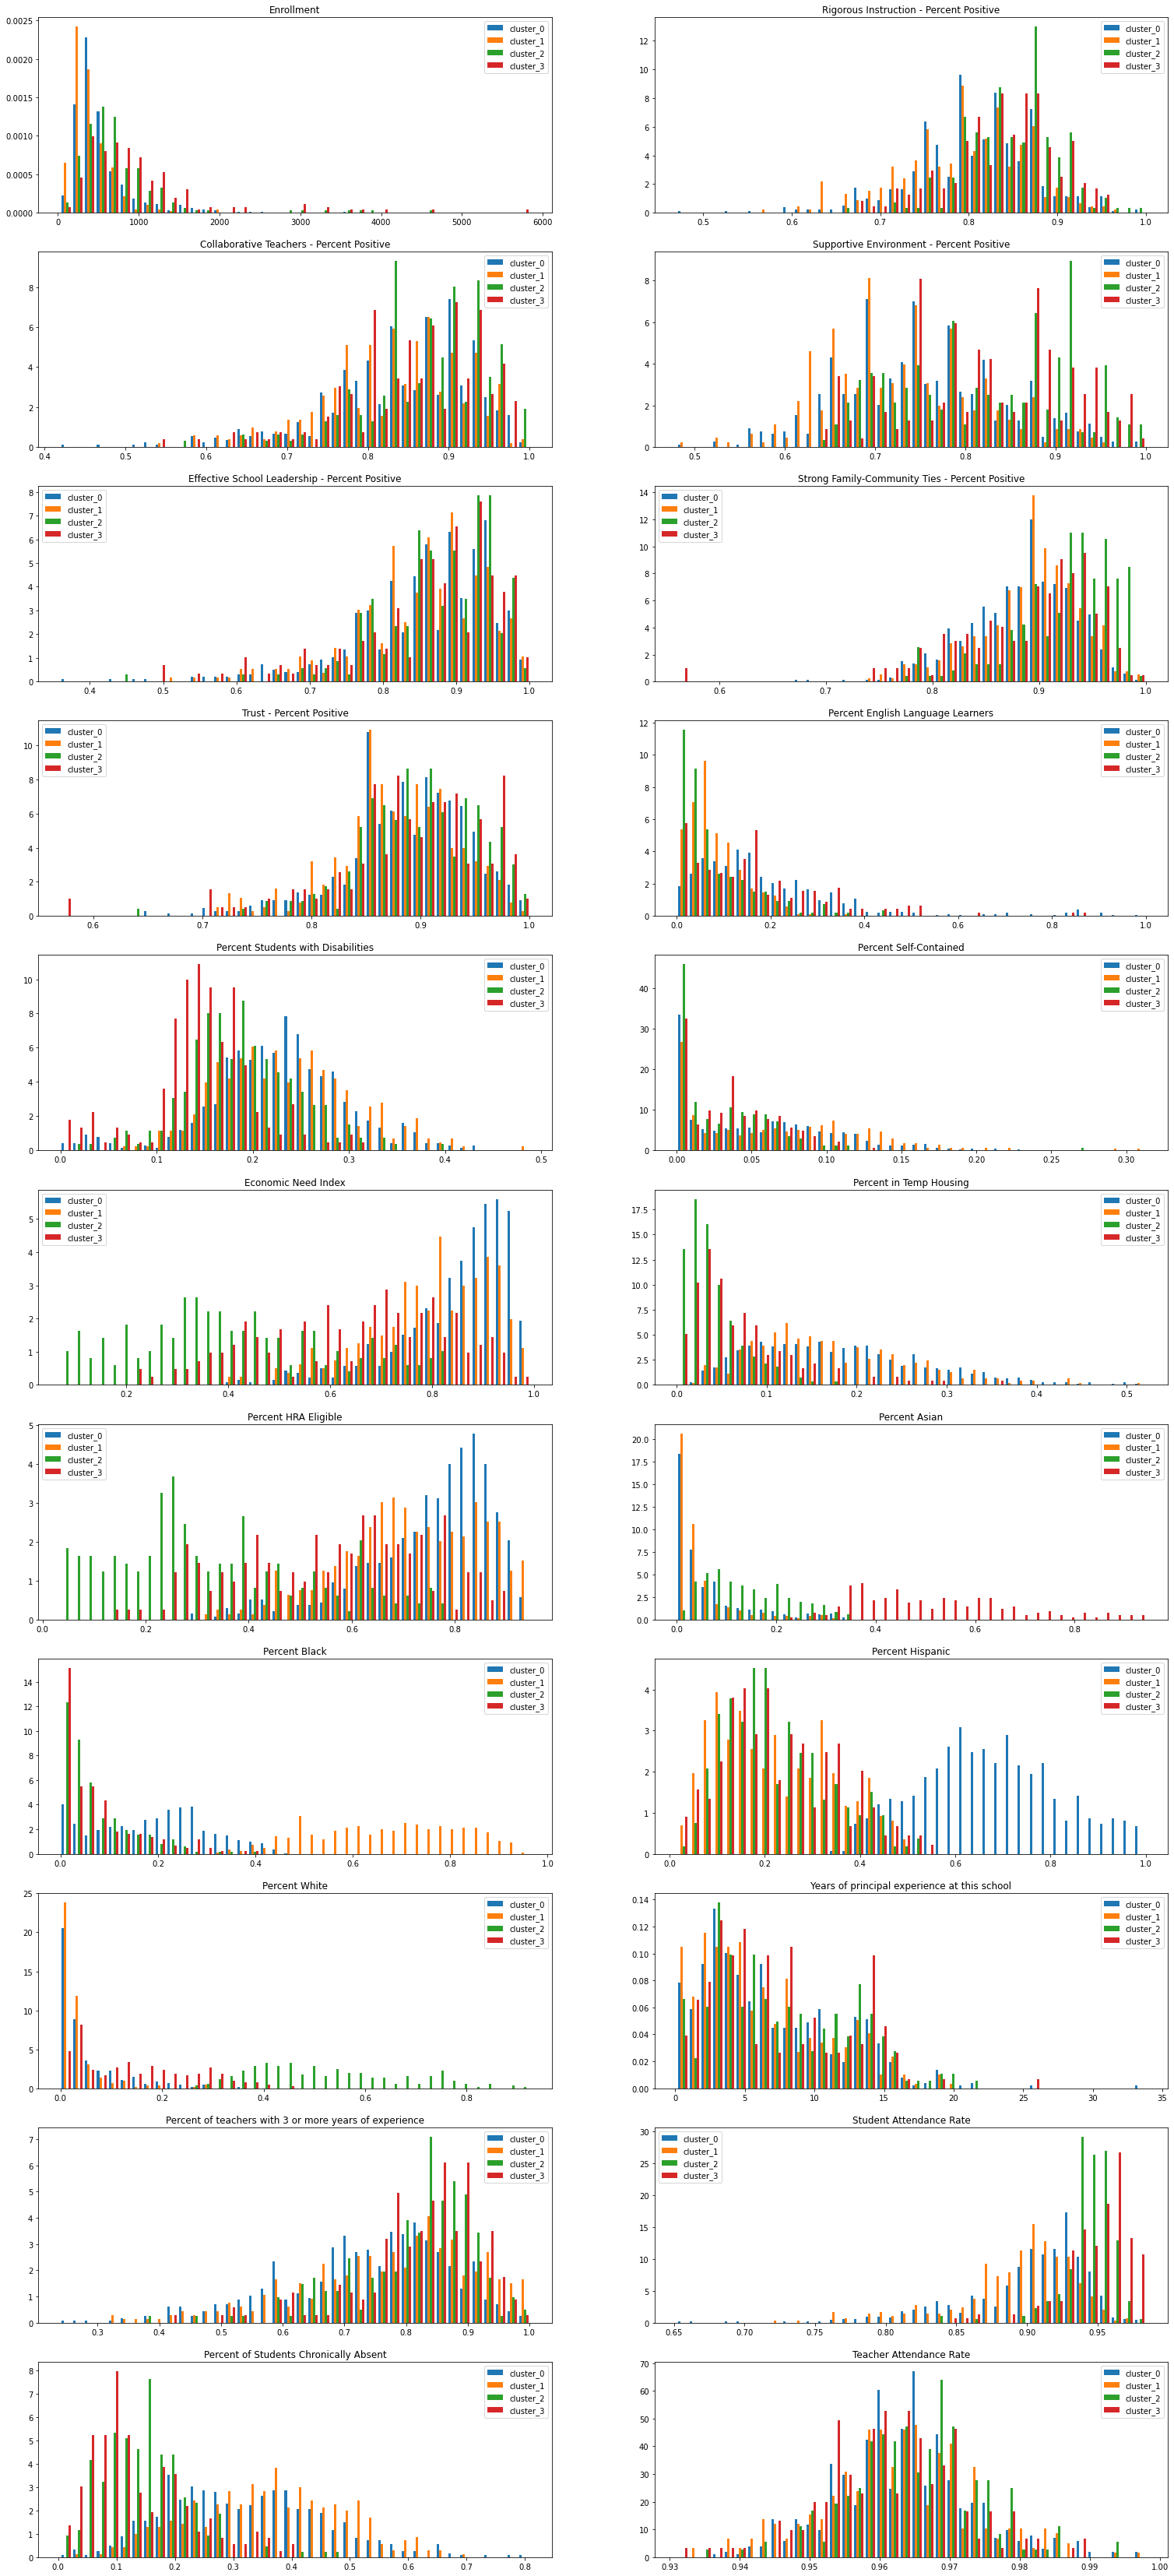

In [29]:
fig = plt.figure(figsize = (26,60));bins = 40
for i in range(22):
    ax = fig.add_subplot(11, 2, i+1)
    x=df_NUM[df_NUM['race_pred']==0].iloc[:,i+6];y=df_NUM[df_NUM['race_pred']==1].iloc[:,i+6];z=df_NUM[df_NUM['race_pred']==2].iloc[:,i+6];q=df_NUM[df_NUM['race_pred']==3].iloc[:,i+6]
    ax.hist([x, y, z, q], bins, label=['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3'],density=True)
    ax.set_title(df_NUM.columns[i+6]);ax.legend()

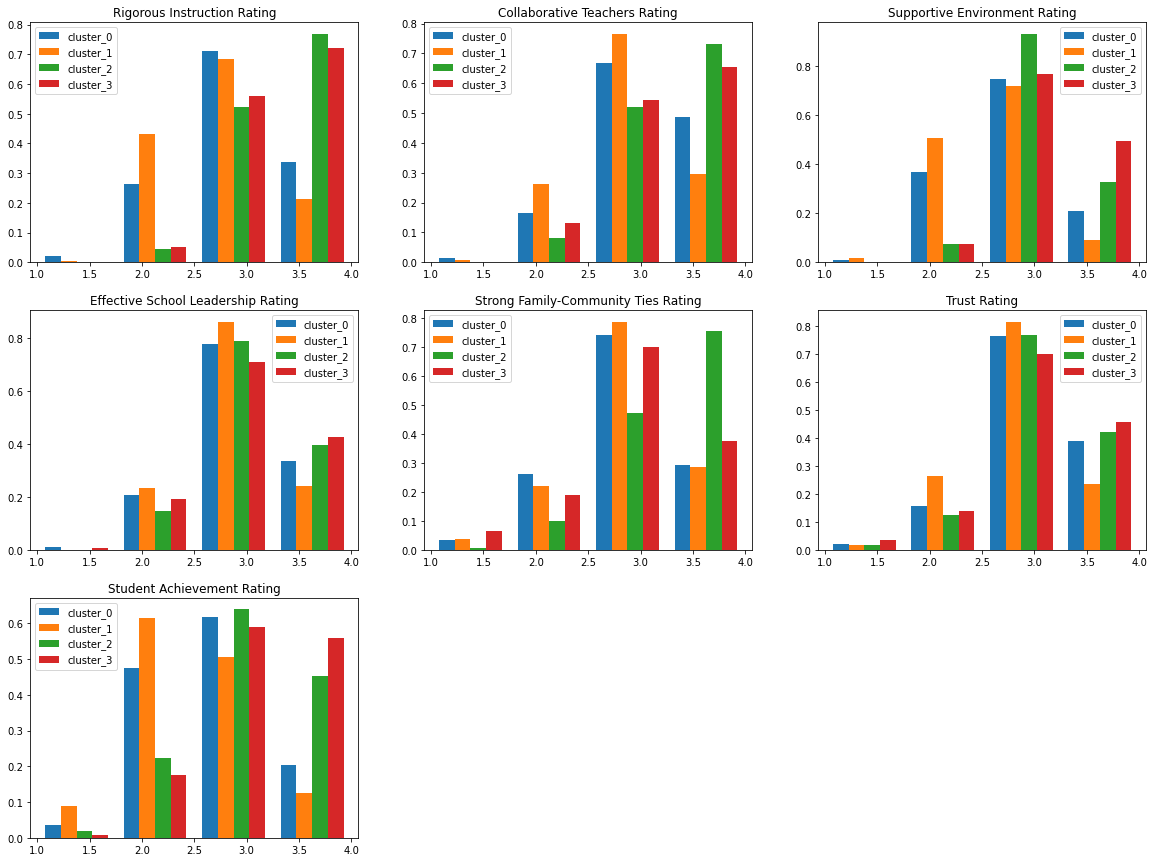

In [30]:
fig = plt.figure(figsize = (20,15));bins = 4
for i in range(7):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['race_pred']==0].iloc[:,i+28];y=df_NUM[df_NUM['race_pred']==1].iloc[:,i+28];z=df_NUM[df_NUM['race_pred']==2].iloc[:,i+28];q=df_NUM[df_NUM['race_pred']==3].iloc[:,i+28]
    ax.hist([x, y, z, q], bins, label=['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3'],density=True)
    ax.set_title(df_NUM.columns[i+28]);ax.legend()

#### Without Race

In [31]:
Without_Race = df_NUM[['Enrollment', 'Rigorous Instruction - Percent Positive',\
       'Collaborative Teachers - Percent Positive','Supportive Environment - Percent Positive',\
       'Effective School Leadership - Percent Positive','Strong Family-Community Ties - Percent Positive',\
       'Trust - Percent Positive', 'Percent English Language Learners',\
       'Percent Students with Disabilities', 'Percent Self-Contained',\
       'Economic Need Index', 'Percent in Temp Housing','Percent HRA Eligible',\
       'Years of principal experience at this school','Percent of teachers with 3 or more years of experience',\
       'Student Attendance Rate', 'Percent of Students Chronically Absent','Teacher Attendance Rate', 'Rigorous Instruction Rating',\
       'Collaborative Teachers Rating', 'Supportive Environment Rating','Effective School Leadership Rating',\
       'Strong Family-Community Ties Rating', 'Trust Rating','Student Achievement Rating', 'School Type_Elementary',\
       'School Type_High School', 'School Type_K-8', 'School Type_Middle','overall_pred', 'basic_pred']]
data1 = preprocessing.normalize(Without_Race)

silhouette_result = {}
for n_clusters in range(2,7): 
    km = KMeans(n_clusters=n_clusters, random_state=10); cluster_labels = km.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels); silhouette_result[n_clusters] = silhouette_avg
    cluster_num = max(silhouette_result, key=silhouette_result.get)
print(cluster_num)    
km = KMeans(n_clusters=cluster_num); res = km.fit(data1); pred=km.predict(data1); df_NUM['Without_Race_pred'] = list(pred)

2


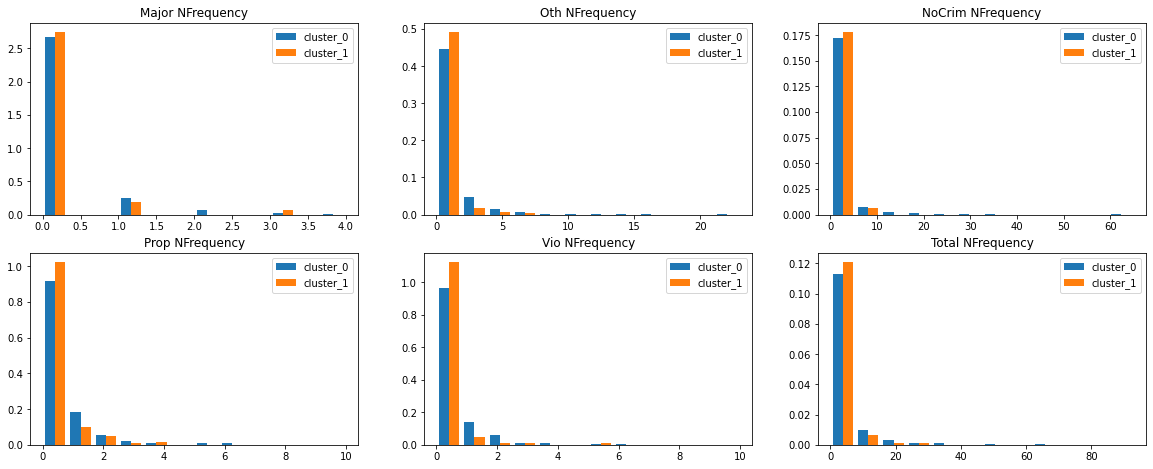

In [32]:
fig = plt.figure(figsize = (20,12));bins = 12
for i in range(6):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['Without_Race_pred']==0].iloc[:,i];y=df_NUM[df_NUM['Without_Race_pred']==1].iloc[:,i]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i]+'Frequency');ax.legend()

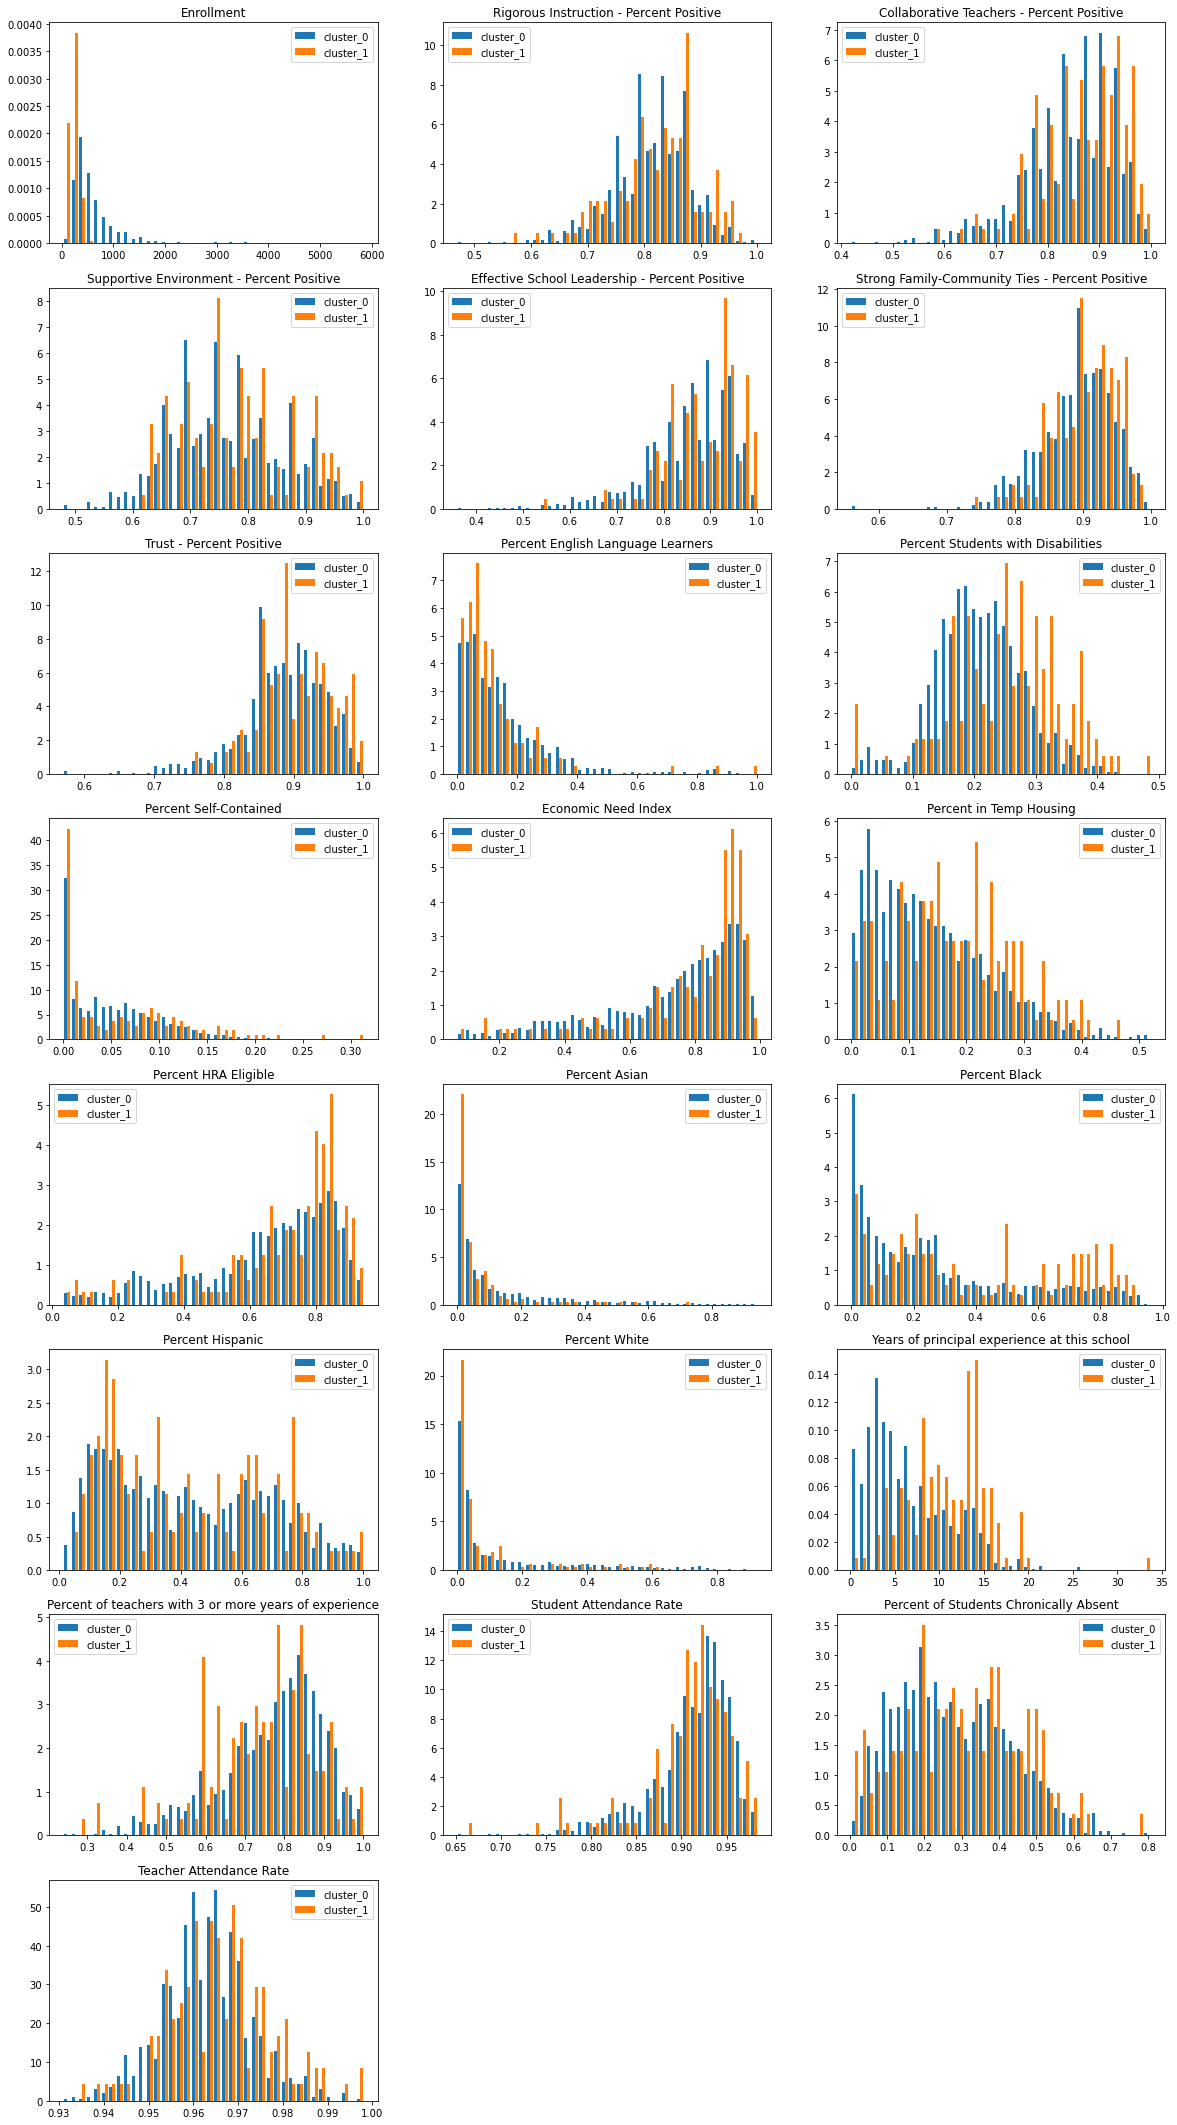

In [33]:
fig = plt.figure(figsize = (20,48));bins = 40
for i in range(22):
    ax = fig.add_subplot(10, 3, i+1)
    x=df_NUM[df_NUM['Without_Race_pred']==0].iloc[:,i+6];y=df_NUM[df_NUM['Without_Race_pred']==1].iloc[:,i+6]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+6]);ax.legend()

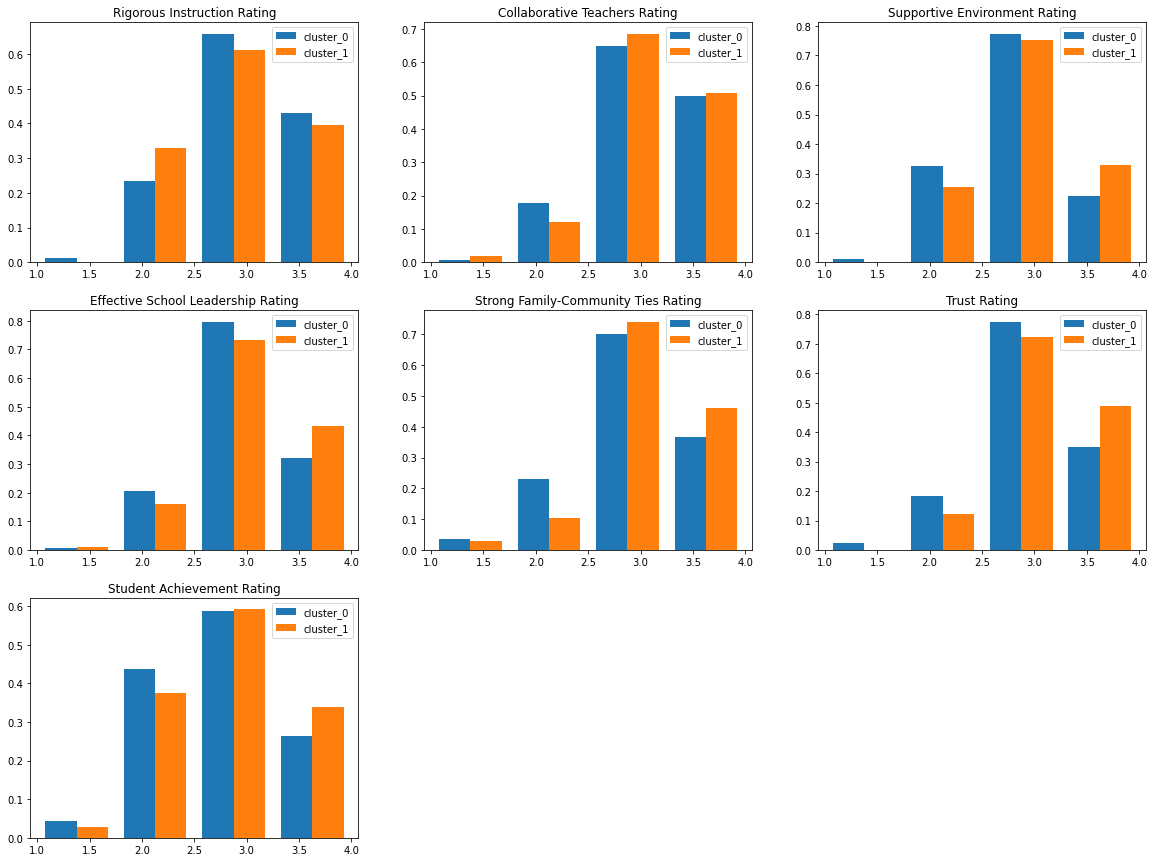

In [34]:
fig = plt.figure(figsize = (20,15));bins = 4
for i in range(7):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['Without_Race_pred']==0].iloc[:,i+28];y=df_NUM[df_NUM['Without_Race_pred']==1].iloc[:,i+28]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+28]);ax.legend()

In [35]:
from sklearn.model_selection import train_test_split
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import K2Score, BicScore, BDeuScore
from pgmpy.estimators import BayesianEstimator

from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator

In [36]:
df_for_baysian = df_NUM.copy()

In [37]:
#df_for_baysian['Enrollment']= pd.Series(pd.cut(Data4[[i]].to_numpy().flatten().astype(np.float64),5, labels=["0", "1", "2","3","4"]))
df_for_baysian['Enrollment'] = pd.cut(df_for_baysian['Enrollment'], bins=[0,150,500,1000,2000,np.inf], labels=[0,1,2,3,4])

In [38]:
df_for_baysian['Years of principal experience at this school'] = df_for_baysian['Years of principal experience at this school'].astype(int)

In [39]:
df_for_baysian['school type'] = df_for_baysian['School Type_Elementary']*1 + df_for_baysian['School Type_High School']*3 +\
df_for_baysian['School Type_K-8']*0 + df_for_baysian['School Type_Middle']*2

## Real-Value Bayesian Networks

In [41]:
df_for_baysian_pre = df_for_baysian[['Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N', 'Total N',
       'Enrollment', 'Percent English Language Learners',
       'Percent Students with Disabilities', 'Percent Self-Contained',
       'Economic Need Index', 'Percent in Temp Housing',
       'Percent HRA Eligible', 'Percent Asian', 'Percent Black',
       'Percent Hispanic', 'Percent White',
       'Years of principal experience at this school',
       'Percent of teachers with 3 or more years of experience',
       'Student Attendance Rate', 'Percent of Students Chronically Absent',
       'Teacher Attendance Rate', 'Rigorous Instruction Rating',
       'Collaborative Teachers Rating', 'Supportive Environment Rating',
       'Effective School Leadership Rating',
       'Strong Family-Community Ties Rating', 'Trust Rating',
       'Student Achievement Rating', 'school type']]

In [42]:
train,test=train_test_split(df_for_baysian_pre,random_state=999,test_size=0.2)

In [43]:
hc = HillClimbSearch(train)
best_model = hc.estimate(scoring_method=BicScore(train))
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('Major N', 'Prop N'), ('Enrollment', 'school type'), ('Rigorous Instruction Rating', 'Supportive Environment Rating'), ('Collaborative Teachers Rating', 'Rigorous Instruction Rating'), ('Supportive Environment Rating', 'Student Achievement Rating'), ('Effective School Leadership Rating', 'Collaborative Teachers Rating'), ('Strong Family-Community Ties Rating', 'Trust Rating'), ('Trust Rating', 'Effective School Leadership Rating')]


In [44]:
model = BayesianModel(best_model.edges())
#model.fit(train, estimator=MaximumLikelihoodEstimator)
model.fit(train, estimator=BayesianEstimator, prior_type='K2')
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)
for thenode in model.nodes():
    print(model.local_independencies(thenode))

D:\Anaconda\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


CPD of Major N:
+--------------+------------+
| Major N(0.0) | 0.889401   |
+--------------+------------+
| Major N(1.0) | 0.0801843  |
+--------------+------------+
| Major N(2.0) | 0.0193548  |
+--------------+------------+
| Major N(3.0) | 0.00921659 |
+--------------+------------+
| Major N(4.0) | 0.00184332 |
+--------------+------------+
CPD of Prop N:
+--------------+-----+---------------------+
| Major N      | ... | Major N(4.0)        |
+--------------+-----+---------------------+
| Prop N(0.0)  | ... | 0.09090909090909091 |
+--------------+-----+---------------------+
| Prop N(1.0)  | ... | 0.09090909090909091 |
+--------------+-----+---------------------+
| Prop N(2.0)  | ... | 0.18181818181818182 |
+--------------+-----+---------------------+
| Prop N(3.0)  | ... | 0.09090909090909091 |
+--------------+-----+---------------------+
| Prop N(4.0)  | ... | 0.09090909090909091 |
+--------------+-----+---------------------+
| Prop N(5.0)  | ... | 0.09090909090909091 |
+--------

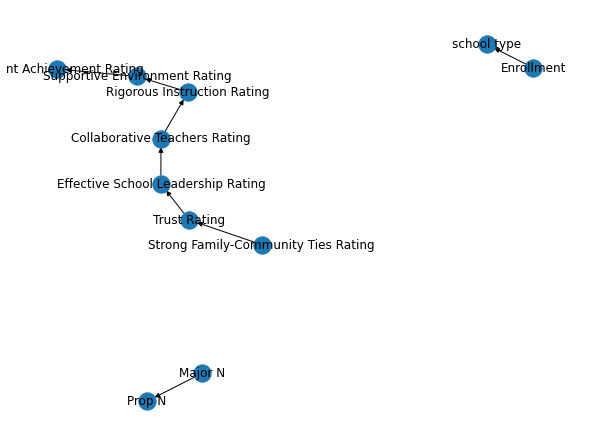

In [45]:
import networkx as nx
plt.rcParams["figure.figsize"] = (8,6)
G=nx.DiGraph()
G.add_edges_from(best_model.edges())
nx.draw(G,with_labels=True,arrows=True)

In [46]:
train_x = train.loc[:, 'Rigorous Instruction Rating':'Trust Rating']
predicted_train = model.predict(train_x)
print("In sample:",(train.loc[:,'Student Achievement Rating'].reset_index(drop=True)==predicted_train['Student Achievement Rating']).mean())

test_x = test.loc[:, 'Rigorous Instruction Rating':'Trust Rating']
predicted_test = model.predict(test_x)
print("Out of sample:",(test.loc[:,'Student Achievement Rating'].reset_index(drop=True)==predicted_test['Student Achievement Rating']).mean())

  0%|          | 0/232 [00:00<?, ?it/s]

In sample: 0.5333333333333333


D:\Anaconda\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/128 [00:00<?, ?it/s]

Out of sample: 0.5498154981549815


D:\Anaconda\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


In [47]:
from pgmpy.estimators import PC
from pgmpy.estimators.CITests import chi_square

In [48]:
int_df_for_baysian_pre = df_for_baysian_pre
def f(x):
    x = x*100
    return x.astype(int)
int_df_for_baysian_pre[['Percent English Language Learners',
       'Percent Students with Disabilities', 'Percent Self-Contained',
       'Economic Need Index', 'Percent in Temp Housing',
       'Percent HRA Eligible', 'Percent Asian', 'Percent Black',
       'Percent Hispanic', 'Percent White',
       'Percent of teachers with 3 or more years of experience',
       'Student Attendance Rate', 'Percent of Students Chronically Absent','Teacher Attendance Rate']]=\
int_df_for_baysian_pre[['Percent English Language Learners',
       'Percent Students with Disabilities', 'Percent Self-Contained',
       'Economic Need Index', 'Percent in Temp Housing',
       'Percent HRA Eligible', 'Percent Asian', 'Percent Black',
       'Percent Hispanic', 'Percent White',
       'Percent of teachers with 3 or more years of experience',
       'Student Attendance Rate', 'Percent of Students Chronically Absent','Teacher Attendance Rate']].apply(f,axis =1)
int_df_for_baysian_pre = int_df_for_baysian_pre.astype(int)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11224\1143065115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_df_for_baysian_pre[['Percent English Language Learners',


In [49]:
train_int,test_int=train_test_split(int_df_for_baysian_pre,random_state=999,test_size=0.2)

In [50]:
est = PC(train_int)
skel, separating_sets = est.build_skeleton(significance_level=0.01)
print("Undirected edges: ", skel.edges())
pdag = est.skeleton_to_pdag(skel, separating_sets)
print("PDAG edges:       ", pdag.edges())
model = est.estimate()
print("DAG edges:        ", model.edges())

  0%|          | 0/5 [00:00<?, ?it/s]

Undirected edges:  [('Major N', 'Oth N'), ('Major N', 'Total N'), ('Oth N', 'NoCrim N'), ('Oth N', 'Total N'), ('NoCrim N', 'Prop N'), ('NoCrim N', 'Total N'), ('Prop N', 'Vio N'), ('Enrollment', 'school type'), ('Percent English Language Learners', 'Percent Asian'), ('Percent Students with Disabilities', 'Percent of Students Chronically Absent'), ('Percent Self-Contained', 'school type'), ('Economic Need Index', 'Percent HRA Eligible'), ('Percent in Temp Housing', 'Percent of teachers with 3 or more years of experience'), ('Percent in Temp Housing', 'Percent of Students Chronically Absent'), ('Percent HRA Eligible', 'Percent Asian'), ('Percent Black', 'Percent of teachers with 3 or more years of experience'), ('Percent Black', 'Student Attendance Rate'), ('Student Attendance Rate', 'Percent of Students Chronically Absent'), ('Rigorous Instruction Rating', 'Collaborative Teachers Rating'), ('Rigorous Instruction Rating', 'Supportive Environment Rating'), ('Rigorous Instruction Rating',

  0%|          | 0/5 [00:00<?, ?it/s]

DAG edges:         [('Trust Rating', 'Strong Family-Community Ties Rating'), ('Trust Rating', 'Effective School Leadership Rating'), ('Percent Self-Contained', 'school type'), ('Student Achievement Rating', 'Rigorous Instruction Rating'), ('Student Achievement Rating', 'Supportive Environment Rating'), ('Rigorous Instruction Rating', 'Supportive Environment Rating'), ('Effective School Leadership Rating', 'Collaborative Teachers Rating'), ('Percent Students with Disabilities', 'Percent of Students Chronically Absent'), ('Student Attendance Rate', 'Percent Black'), ('Student Attendance Rate', 'Percent of Students Chronically Absent'), ('Collaborative Teachers Rating', 'Trust Rating'), ('Collaborative Teachers Rating', 'Rigorous Instruction Rating'), ('Vio N', 'Prop N'), ('NoCrim N', 'Oth N'), ('NoCrim N', 'Prop N'), ('Enrollment', 'school type'), ('Percent English Language Learners', 'Percent Asian'), ('Total N', 'Oth N'), ('Total N', 'NoCrim N'), ('Supportive Environment Rating', 'Coll

D:\Anaconda\lib\site-packages\pgmpy\base\DAG.py:1195: UserWarning: PDAG has no faithful extension (= no oriented DAG with the same v-structures as PDAG). Remaining undirected PDAG edges oriented arbitrarily.
  warn(


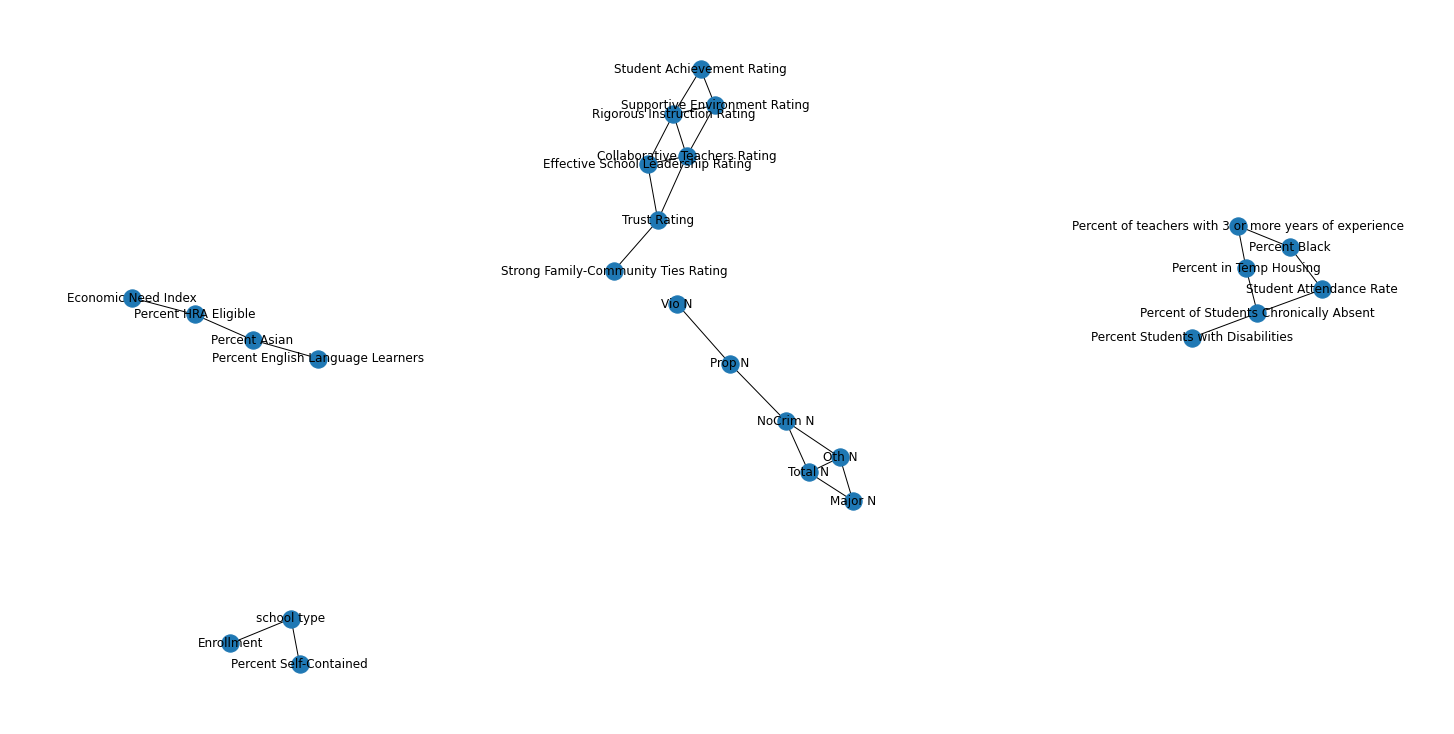

In [52]:
plt.rcParams["figure.figsize"] = (20,10)
G=nx.Graph()
G.add_edges_from(skel.edges())
nx.draw(G,with_labels=True)

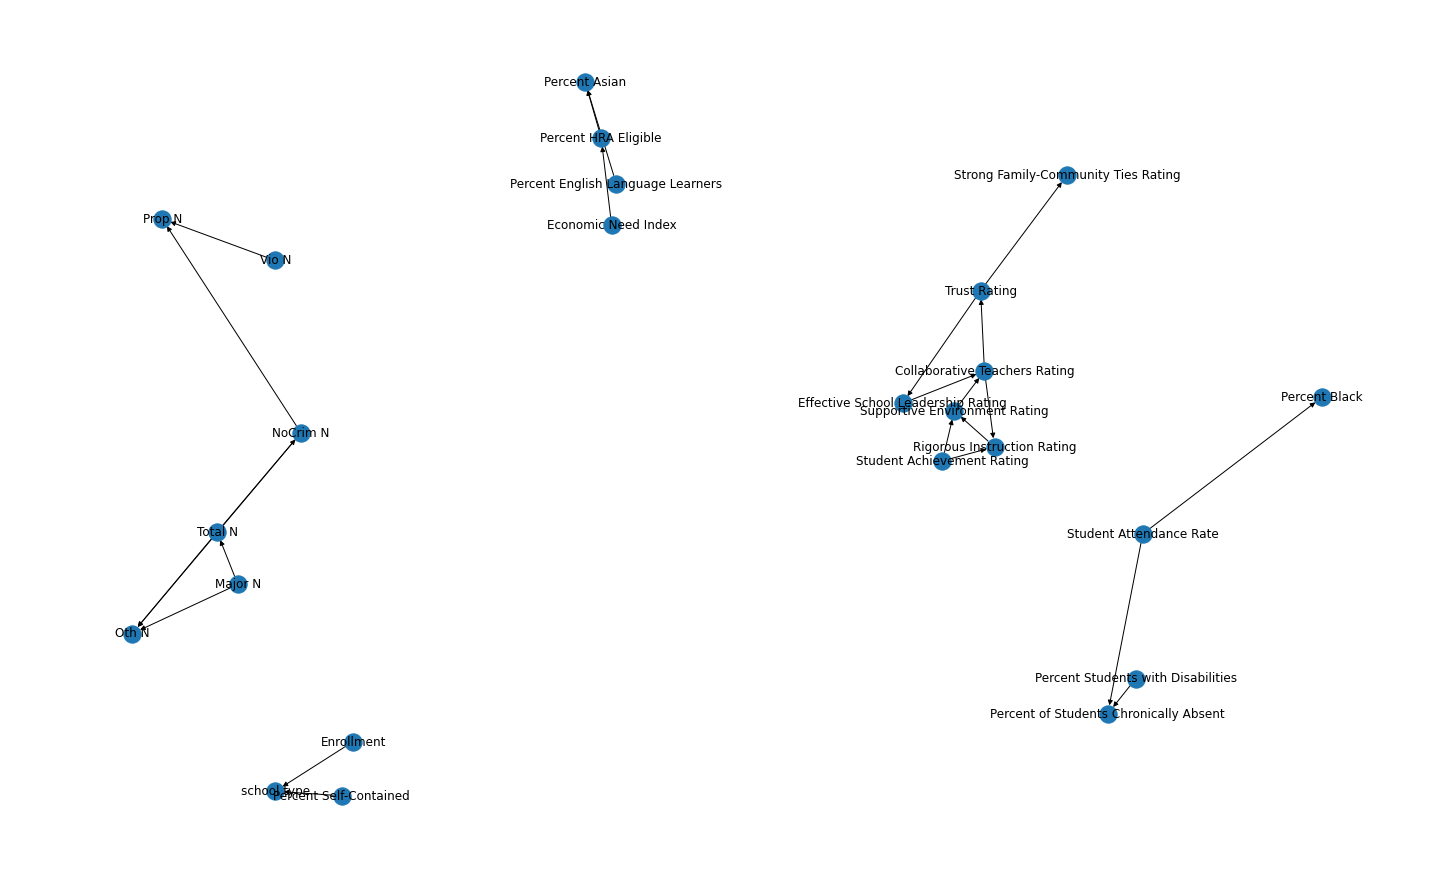

In [82]:
plt.rcParams["figure.figsize"] = (20,12)
G=nx.DiGraph()
G.add_edges_from(model.edges())
nx.draw(G,with_labels=True,arrows=True)

## Discretized Data

### HillClimbSearch

In [60]:
descreta_for_baysian = df_for_baysian.copy()
descreta_for_baysian = descreta_for_baysian.drop(columns = ['Rigorous Instruction Rating','Collaborative Teachers Rating', \
                                                            'Supportive Environment Rating','Effective School Leadership Rating',\
                                                            'Strong Family-Community Ties Rating', 'Trust Rating','School Type_Elementary',\
                                                            'School Type_High School', 'School Type_K-8', 'School Type_Middle'])
#descreta_for_baysian.columns

Index(['Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N', 'Total N',
       'Enrollment', 'Rigorous Instruction - Percent Positive',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Effective School Leadership - Percent Positive',
       'Strong Family-Community Ties - Percent Positive',
       'Trust - Percent Positive', 'Percent English Language Learners',
       'Percent Students with Disabilities', 'Percent Self-Contained',
       'Economic Need Index', 'Percent in Temp Housing',
       'Percent HRA Eligible', 'Percent Asian', 'Percent Black',
       'Percent Hispanic', 'Percent White',
       'Years of principal experience at this school',
       'Percent of teachers with 3 or more years of experience',
       'Student Attendance Rate', 'Percent of Students Chronically Absent',
       'Teacher Attendance Rate', 'Student Achievement Rating', 'overall_pred',
       'basic_pred', 'Education_Quality_pred', 'Whether_poor_pr

In [62]:
for i in descreta_for_baysian.columns[0:6]: 
    descreta_for_baysian[i] = pd.cut(descreta_for_baysian[i], bins=[-0.1,1,np.inf], labels=[0,1])

for i in descreta_for_baysian.columns[7:13]: 
    descreta_for_baysian[i] = pd.cut(descreta_for_baysian[i], 5, labels=[0,1,2,3,4])

for i in descreta_for_baysian.columns[13:23]: 
    descreta_for_baysian[i] = pd.cut(descreta_for_baysian[i], bins=[-0.1,0.2,0.4,0.6,0.8,np.inf], labels=[0,1,2,3,4])

descreta_for_baysian['Years of principal experience at this school'] =\
pd.cut(descreta_for_baysian['Years of principal experience at this school'], bins=[-0.1,3,6,11,15,np.inf], labels=[0,1,2,3,4])
   
for i in descreta_for_baysian.columns[24:28]:
    descreta_for_baysian[i] = pd.cut(descreta_for_baysian[i], 5, labels=[0,1,2,3,4])
    
descreta_for_baysian['Student Achievement Rating'] = \
pd.cut(descreta_for_baysian['Student Achievement Rating'],4,labels=[0,1,2,3])

In [66]:
descreta_for_baysian_pre = descreta_for_baysian[['Total N',
       'Enrollment', 'Rigorous Instruction - Percent Positive',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Effective School Leadership - Percent Positive',
       'Strong Family-Community Ties - Percent Positive',
       'Trust - Percent Positive', 'Percent English Language Learners',
       'Percent Students with Disabilities', 'Percent Self-Contained',
       'Economic Need Index', 'Percent in Temp Housing',
       'Percent HRA Eligible', 'Percent Asian', 'Percent Black',
       'Percent Hispanic', 'Percent White',
       'Years of principal experience at this school',
       'Percent of teachers with 3 or more years of experience',
       'Student Attendance Rate', 'Percent of Students Chronically Absent',
       'Teacher Attendance Rate', 'Student Achievement Rating', 'school type']]

In [67]:
train_des,test_des=train_test_split(descreta_for_baysian_pre,random_state=999,test_size=0.3)

hc = HillClimbSearch(train_des)
best_model = hc.estimate(scoring_method=BicScore(train_des))
#print(best_model.edges())

model = BayesianModel(best_model.edges())
model.fit(train_des, estimator=BayesianEstimator, prior_type='K2')
#for cpd in model.get_cpds():
    #print("CPD of {variable}:".format(variable=cpd.variable))
    #print(cpd)
#for thenode in model.nodes():
    #print(model.local_independencies(thenode))

  0%|          | 0/1000000 [00:00<?, ?it/s]

D:\Anaconda\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


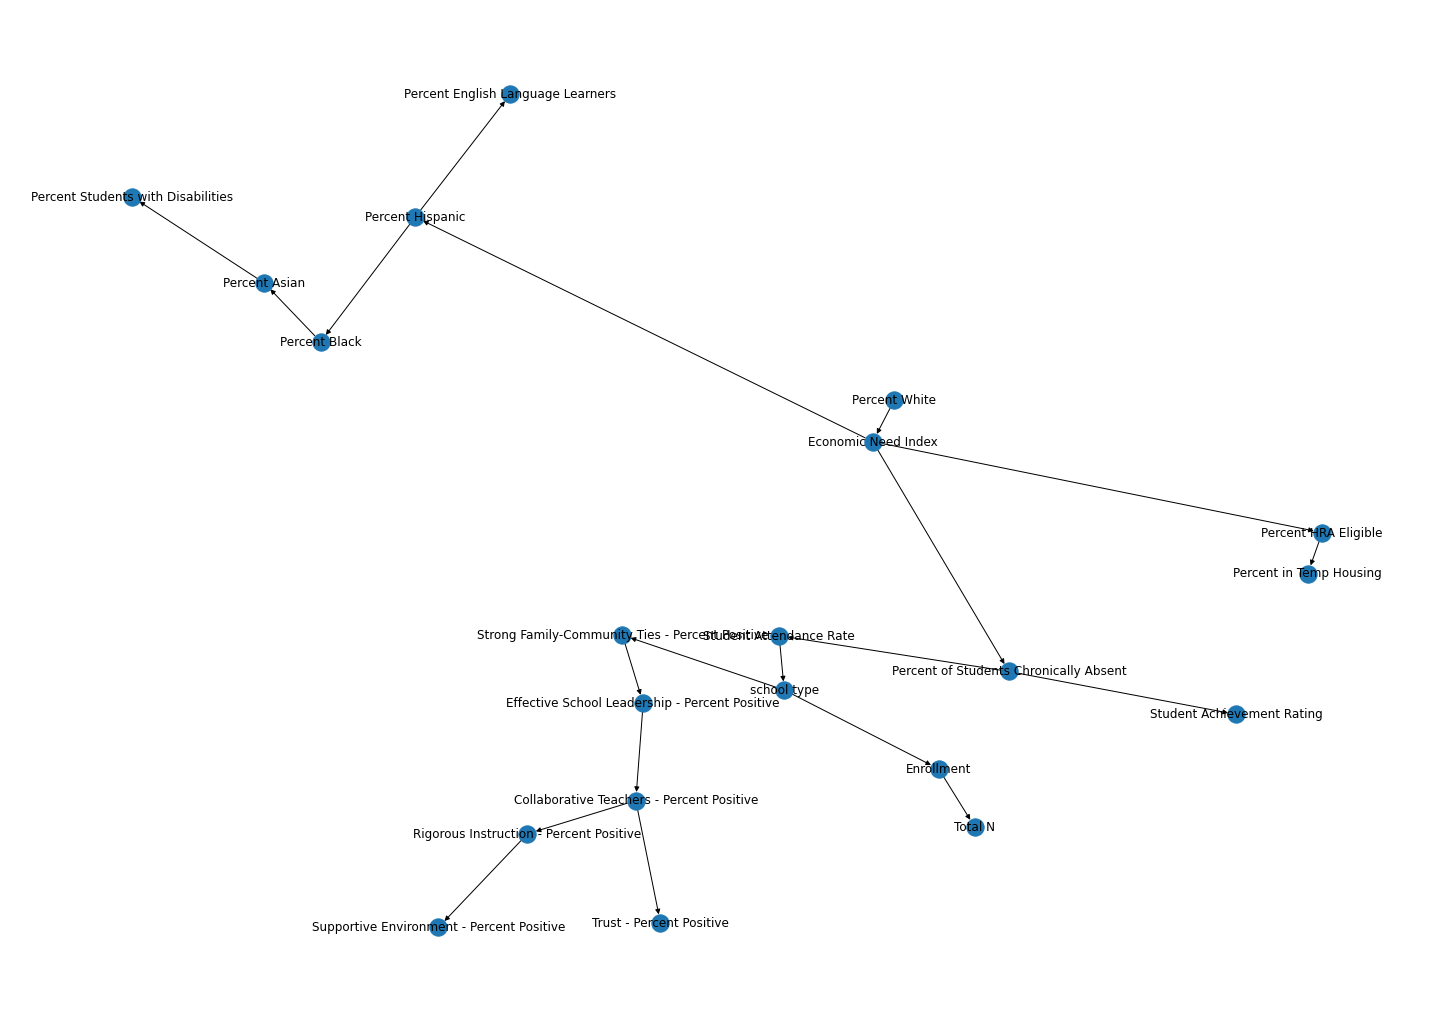

In [70]:
import networkx as nx
plt.rcParams["figure.figsize"] = (20,14)
G=nx.DiGraph()
G.add_edges_from(best_model.edges())
nx.draw(G,with_labels=True,arrows=True)

In [78]:
temp = list(G.nodes()); temp.remove('Total N')
train_y = train_des.loc[:, temp]
predicted_train = model.predict(train_y)
print("In sample:",(train_des.loc[:,'Total N'].reset_index(drop=True)==predicted_train['Total N']).mean())

test_y = test_des.loc[:, temp]
predicted_test = model.predict(test_y)
print("Out of sample:",(test_des.loc[:,'Total N'].reset_index(drop=True)==predicted_test['Total N']).mean())

  0%|          | 0/938 [00:00<?, ?it/s]

In sample: 0.6698412698412698


D:\Anaconda\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/403 [00:00<?, ?it/s]

Out of sample: 0.6822660098522167


D:\Anaconda\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


### PC Algorithm

In [79]:
from pgmpy.estimators import PC
from pgmpy.estimators.CITests import chi_square

In [86]:
descreta_for_baysian_PC = descreta_for_baysian_pre.copy()
descreta_for_baysian_PC = descreta_for_baysian_PC.astype(int)
train_des_PC,test_des_PC=train_test_split(descreta_for_baysian_PC,random_state=999,test_size=0.3)

In [88]:
est = PC(train_des_PC)
skel, separating_sets = est.build_skeleton(significance_level=0.05)
print("Undirected edges: ", skel.edges())
pdag = est.skeleton_to_pdag(skel, separating_sets)
print("PDAG edges:       ", pdag.edges())
model = est.estimate()
print("DAG edges:        ", model.edges())

  0%|          | 0/5 [00:00<?, ?it/s]

Undirected edges:  [('Total N', 'Enrollment'), ('Total N', 'school type'), ('Enrollment', 'Strong Family-Community Ties - Percent Positive'), ('Enrollment', 'Percent Black'), ('Enrollment', 'school type'), ('Rigorous Instruction - Percent Positive', 'Collaborative Teachers - Percent Positive'), ('Rigorous Instruction - Percent Positive', 'Supportive Environment - Percent Positive'), ('Rigorous Instruction - Percent Positive', 'Student Achievement Rating'), ('Collaborative Teachers - Percent Positive', 'Effective School Leadership - Percent Positive'), ('Collaborative Teachers - Percent Positive', 'Trust - Percent Positive'), ('Supportive Environment - Percent Positive', 'Trust - Percent Positive'), ('Supportive Environment - Percent Positive', 'Percent Black'), ('Supportive Environment - Percent Positive', 'school type'), ('Effective School Leadership - Percent Positive', 'Trust - Percent Positive'), ('Strong Family-Community Ties - Percent Positive', 'school type'), ('Percent English 

  0%|          | 0/5 [00:00<?, ?it/s]

DAG edges:         [('Total N', 'school type'), ('Total N', 'Enrollment'), ('Strong Family-Community Ties - Percent Positive', 'school type'), ('Student Attendance Rate', 'Percent of Students Chronically Absent'), ('Effective School Leadership - Percent Positive', 'Trust - Percent Positive'), ('Percent in Temp Housing', 'Student Attendance Rate'), ('Rigorous Instruction - Percent Positive', 'Supportive Environment - Percent Positive'), ('Rigorous Instruction - Percent Positive', 'Collaborative Teachers - Percent Positive'), ('Percent Asian', 'Percent Hispanic'), ('Percent White', 'Percent Hispanic'), ('Economic Need Index', 'Percent White'), ('Percent HRA Eligible', 'Percent Students with Disabilities'), ('Percent HRA Eligible', 'Percent in Temp Housing'), ('Percent HRA Eligible', 'Economic Need Index'), ('Collaborative Teachers - Percent Positive', 'Trust - Percent Positive'), ('Collaborative Teachers - Percent Positive', 'Effective School Leadership - Percent Positive'), ('Student Ac

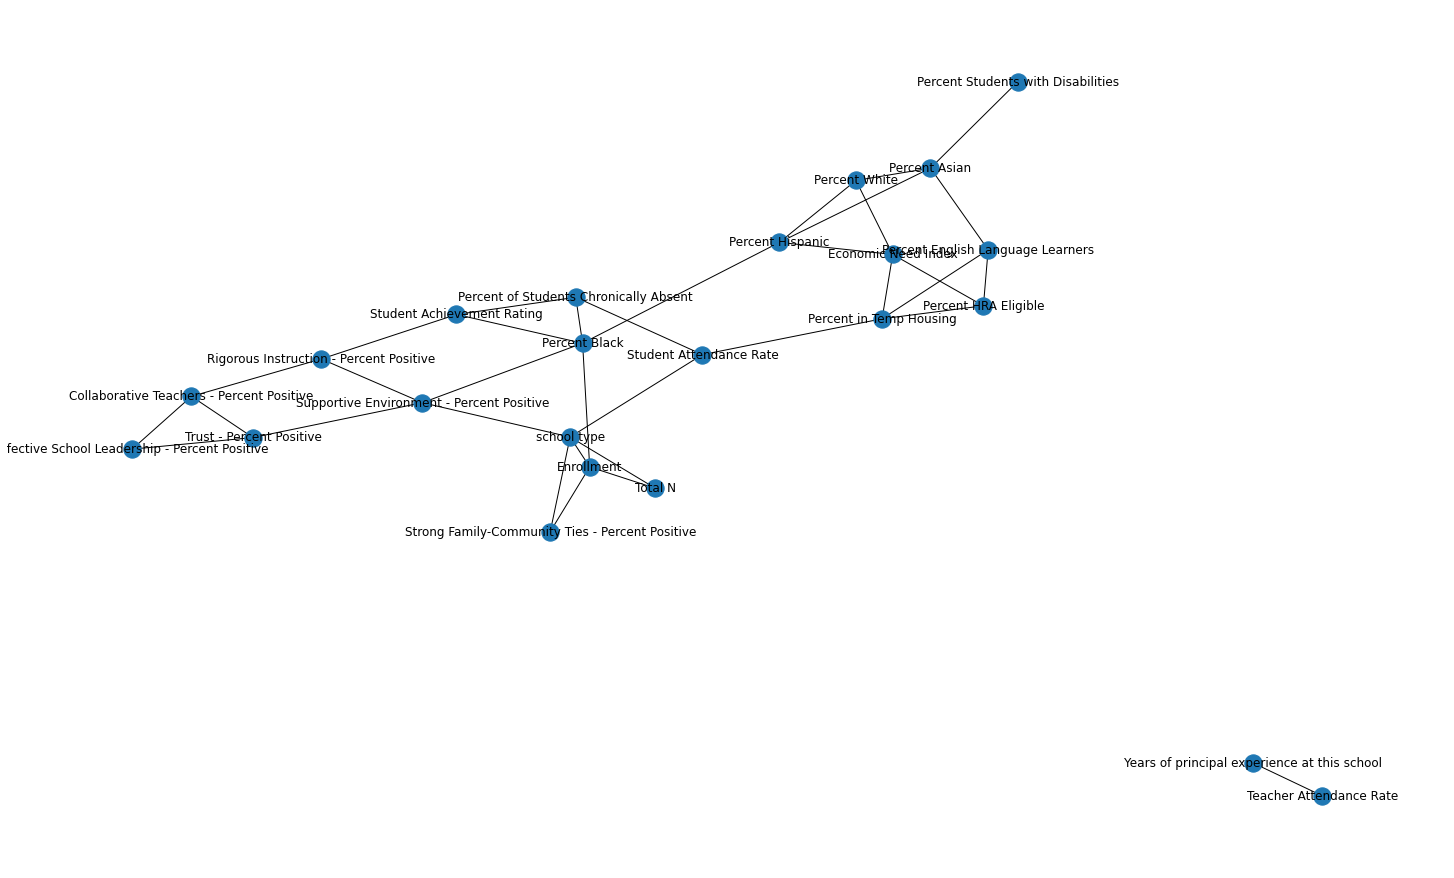

In [123]:
plt.rcParams["figure.figsize"] = (20,12)
G=nx.Graph()
G.add_edges_from(skel.edges())
nx.draw(G,with_labels=True)

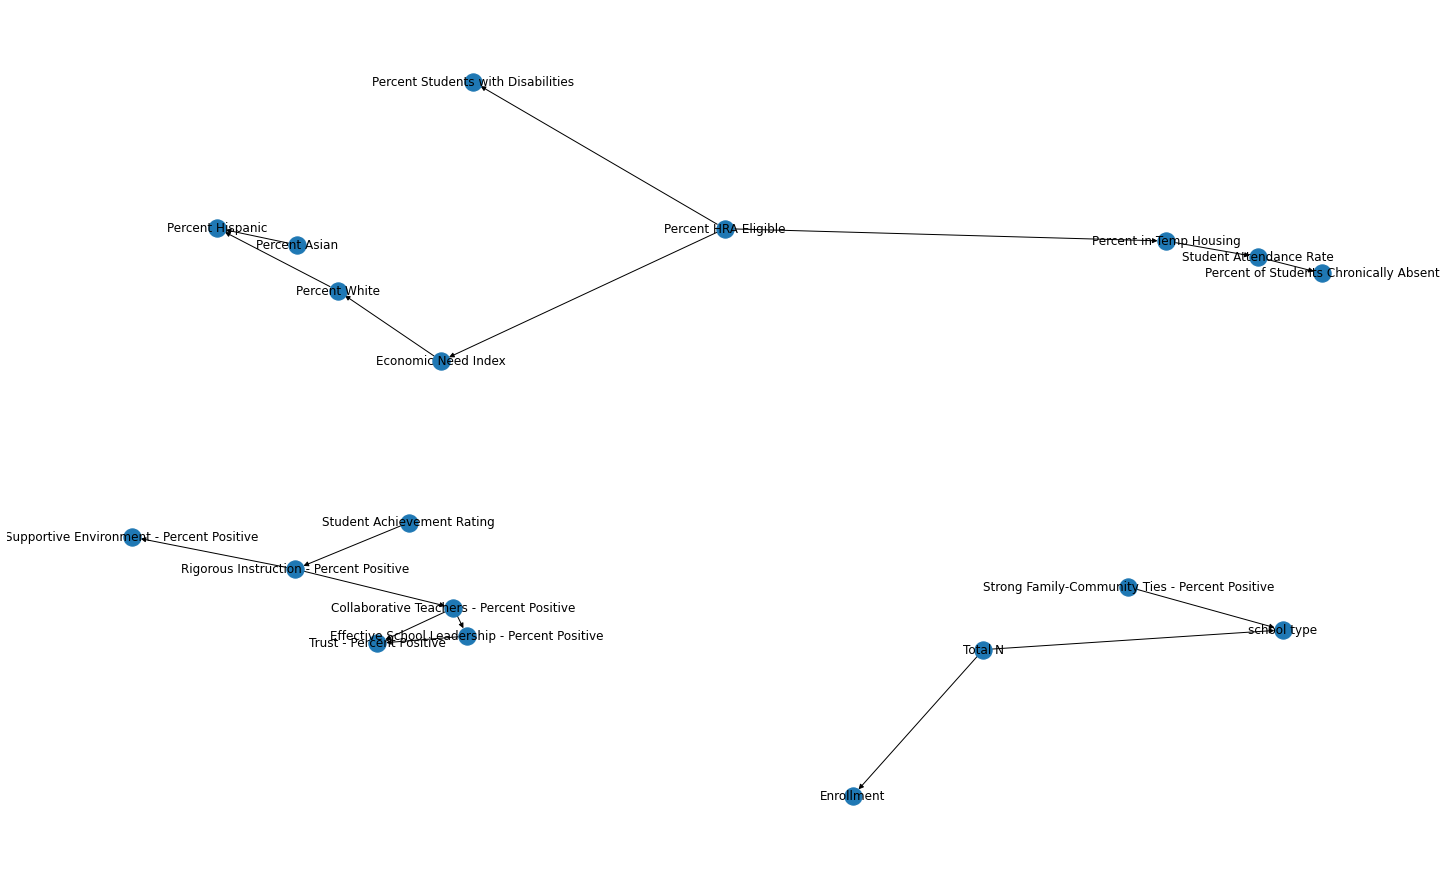

In [135]:
plt.rcParams["figure.figsize"] = (20,12)
G=nx.DiGraph()
G.add_edges_from(model.edges())
nx.draw(G,with_labels=True,arrows=True)

In [144]:
model_PC = BayesianModel(model.edges())
model_PC.fit(train_des, estimator=BayesianEstimator, prior_type='K2')

temp = list(G.nodes()); temp.remove('Total N')
train_y = train_des.loc[:, temp]
predicted_train_PC = model_PC.predict(train_y)
print("In sample:",(train_des.loc[:,'Total N'].reset_index(drop=True)==predicted_train_PC['Total N']).mean())

test_y = test_des.loc[:, temp]
predicted_test_PC = model_PC.predict(test_y)
print("Out of sample:",(test_des.loc[:,'Total N'].reset_index(drop=True)==predicted_test_PC['Total N']).mean())

D:\Anaconda\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


  0%|          | 0/933 [00:00<?, ?it/s]

In sample: 0.6814814814814815


D:\Anaconda\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/403 [00:00<?, ?it/s]

Out of sample: 0.6428571428571429


D:\Anaconda\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


In [145]:
model_PC = BayesianModel(skel.edges())
model_PC.fit(train_des, estimator=BayesianEstimator, prior_type='K2')

temp = list(G.nodes()); temp.remove('Total N')
train_y = train_des.loc[:, temp]
predicted_train_PC = model_PC.predict(train_y)
print("In sample:",(train_des.loc[:,'Total N'].reset_index(drop=True)==predicted_train_PC['Total N']).mean())

test_y = test_des.loc[:, temp]
predicted_test_PC = model_PC.predict(test_y)
print("Out of sample:",(test_des.loc[:,'Total N'].reset_index(drop=True)==predicted_test_PC['Total N']).mean())

D:\Anaconda\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


  0%|          | 0/933 [00:00<?, ?it/s]

In sample: 0.7502645502645503


D:\Anaconda\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/403 [00:00<?, ?it/s]

Out of sample: 0.6896551724137931


D:\Anaconda\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


## Clustered Data

In [385]:
#depen_clus=pd.read_csv('depen_clus.csv'); depen_clus = depen_clus.drop(columns = ['Unnamed: 0'])

In [386]:
Cludata = descreta_for_baysian.copy()
#temp = Cludata.copy()
#Cludata = pd.concat((temp,depen_clus), axis=1)

In [387]:
Cludata['overall_pred'].value_counts()

0    1200
1     151
Name: overall_pred, dtype: int64

In [388]:
Cludata = Cludata[Cludata['overall_pred']==0]
Cludata = Cludata[list(descreta_for_baysian_pre.columns)]
#Cludata = Cludata.drop(columns=['Education_Quality_pred'])

In [389]:
train_des,test_des=train_test_split(Cludata,random_state=999,test_size=0.1)

hc = HillClimbSearch(train_des)
best_model = hc.estimate(scoring_method=BicScore(train_des))
#print(best_model.edges())

model = BayesianModel(best_model.edges())
model.fit(train_des, estimator=BayesianEstimator, prior_type='K2')
#for cpd in model.get_cpds():
    #print("CPD of {variable}:".format(variable=cpd.variable))
    #print(cpd)
#for thenode in model.nodes():
    #print(model.local_independencies(thenode))

  0%|          | 0/1000000 [00:00<?, ?it/s]

D:\Anaconda\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


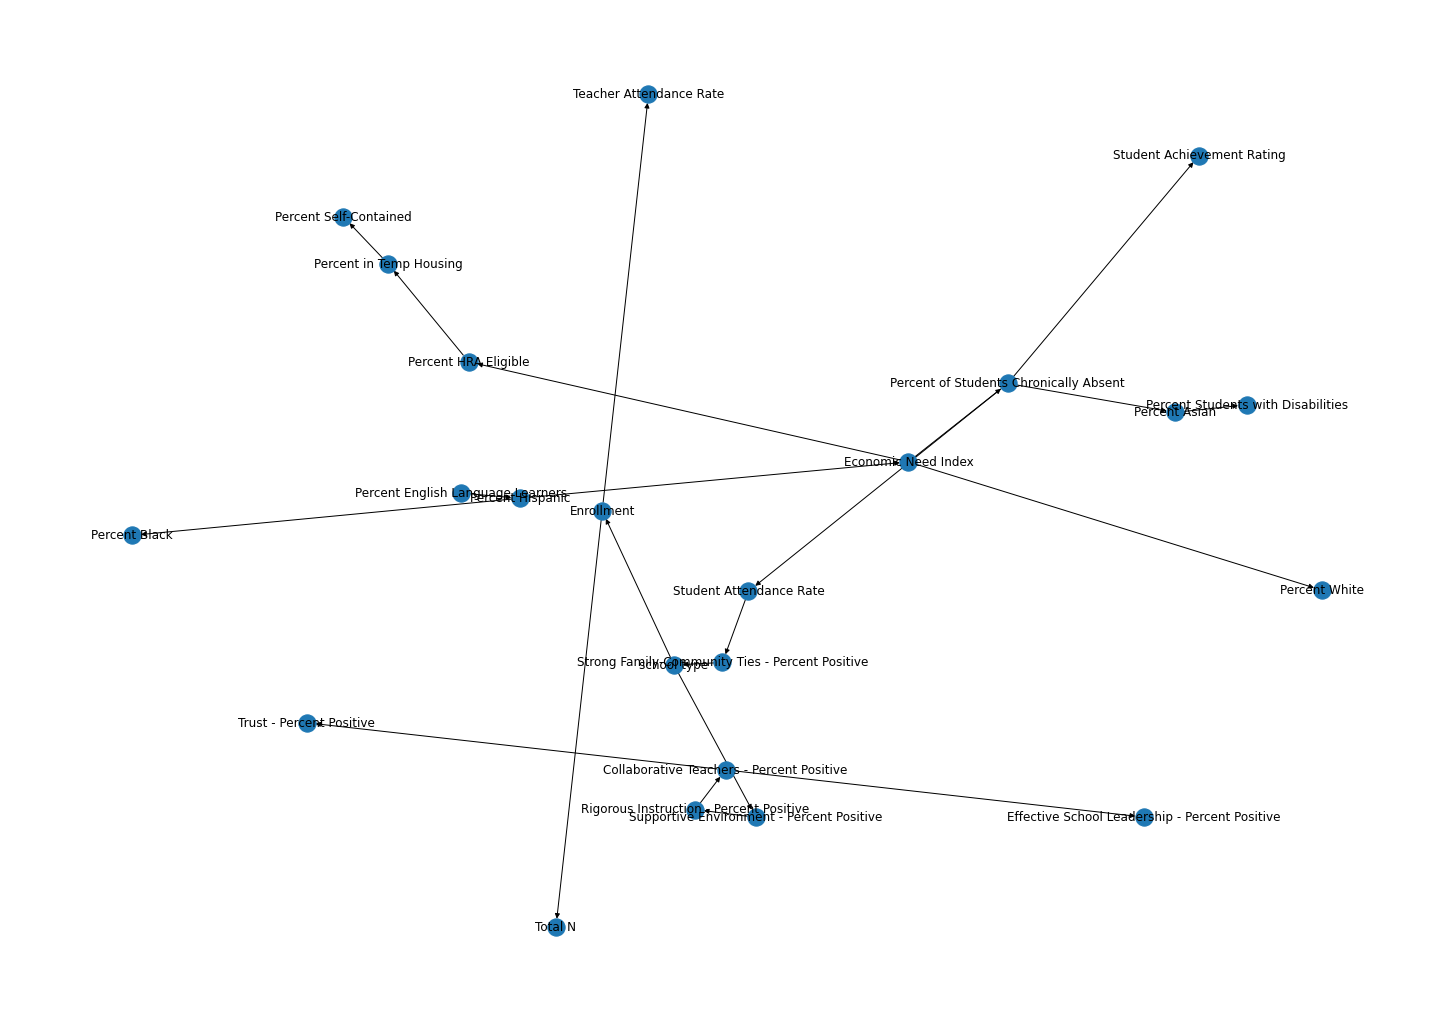

In [390]:
plt.rcParams["figure.figsize"] = (20,14)
G=nx.DiGraph()
G.add_edges_from(best_model.edges())
nx.draw(G,with_labels=True,arrows=True)

In [391]:
temp = list(G.nodes()); temp.remove('Total N')
train_y = train_des.loc[:, temp]
predicted_train = model.predict(train_y)
print("In sample:",(train_des.loc[:,'Total N'].reset_index(drop=True)==predicted_train['Total N']).mean())

test_y = test_des.loc[:, temp]
predicted_test = model.predict(test_y)
print("Out of sample:",(test_des.loc[:,'Total N'].reset_index(drop=True)==predicted_test['Total N']).mean())

  0%|          | 0/1073 [00:00<?, ?it/s]

In sample: 0.6555555555555556


D:\Anaconda\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/120 [00:00<?, ?it/s]

Out of sample: 0.7166666666666667


D:\Anaconda\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


In [392]:
Clu_PC = Cludata.copy()
Clu_PC = Clu_PC.astype(int)
train_des_PC,test_des_PC=train_test_split(Clu_PC,random_state=998,test_size=0.2)

est = PC(train_des_PC)
skel, separating_sets = est.build_skeleton(significance_level=0.05)
#print("Undirected edges: ", skel.edges())
pdag = est.skeleton_to_pdag(skel, separating_sets)
#print("PDAG edges:       ", pdag.edges())
model = est.estimate()
#print("DAG edges:        ", model.edges())

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

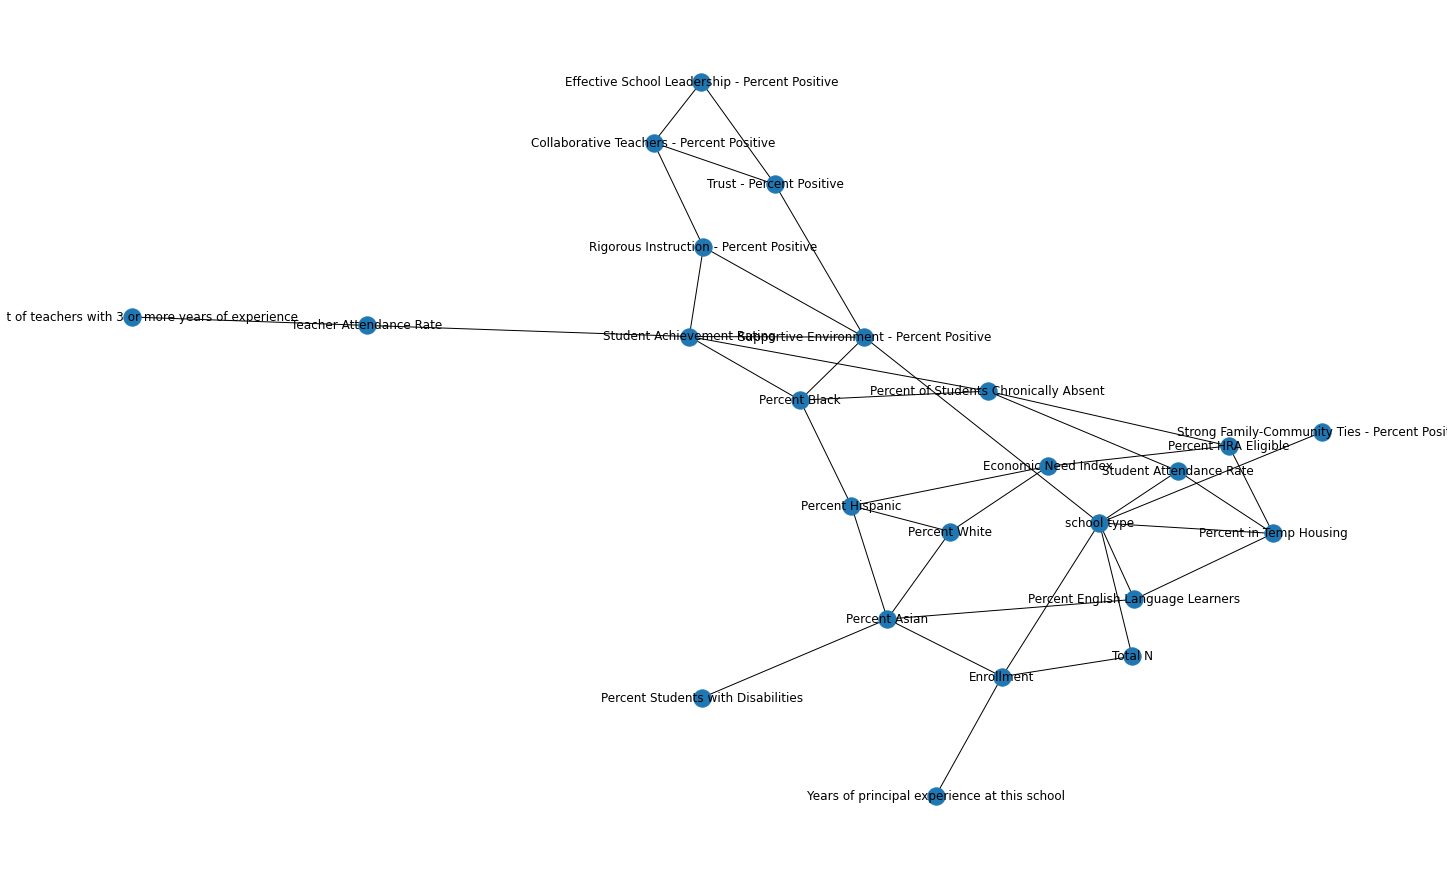

In [393]:
plt.rcParams["figure.figsize"] = (20,12)
G=nx.Graph()
G.add_edges_from(skel.edges())
nx.draw(G,with_labels=True)

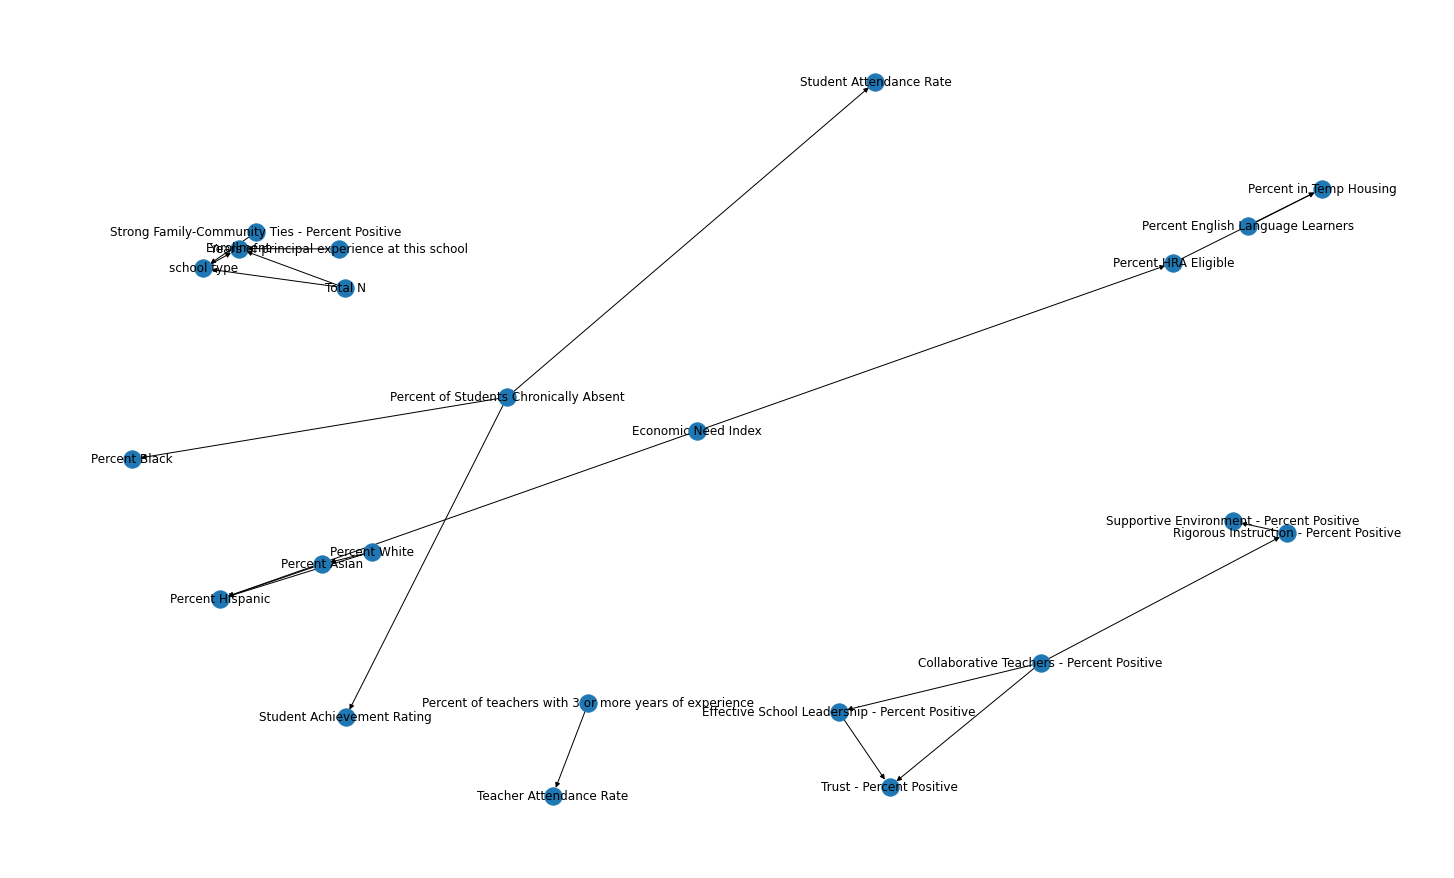

In [394]:
plt.rcParams["figure.figsize"] = (20,12)
G=nx.DiGraph()
G.add_edges_from(model.edges())
nx.draw(G,with_labels=True,arrows=True)

In [395]:
model_PC = BayesianModel(model.edges())
model_PC.fit(train_des, estimator=BayesianEstimator, prior_type='K2')

temp = list(G.nodes()); temp.remove('Total N')
train_y = train_des.loc[:, temp]
predicted_train_PC = model_PC.predict(train_y)
print("In sample:",(train_des.loc[:,'Total N'].reset_index(drop=True)==predicted_train_PC['Total N']).mean())

test_y = test_des.loc[:, temp]
predicted_test_PC = model_PC.predict(test_y)
print("Out of sample:",(test_des.loc[:,'Total N'].reset_index(drop=True)==predicted_test_PC['Total N']).mean())

D:\Anaconda\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


  0%|          | 0/1080 [00:00<?, ?it/s]

In sample: 0.7166666666666667


D:\Anaconda\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/120 [00:00<?, ?it/s]

Out of sample: 0.7083333333333334


D:\Anaconda\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]
